# Experiments 
In this notebook we'll develop some experiments about the performance of LSTM architecture vs TimesFM.

__Content__:
1. Load data and preparate for training
2. Train LSTM
3. Train TimesFM
4. Save results and discussion


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## 1. Train LSTM 
Now we'll train LSTM with 3 windows sizes (7,14,21), 2 different forecast horizon (15,30) and for each interval we add the previous one.

In [3]:
# Load the dataset
df =  pd.read_csv('C:/Users/criju/Documents/Codigos Tesis/data/serie.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Functions for data processing and model building
def create_intervals(df):
    """
    Divide un DataFrame en 8 intervalos regulares basados en la columna 'Fecha',
    grafica los datos y devuelve los intervalos.
    """
    fecha_min = df['Fecha'].min()
    fecha_max = df['Fecha'].max()
    bins = pd.date_range(start=fecha_min, end=fecha_max, periods=9)  # 9 puntos para generar 8 intervalos
    df['Intervalo'] = pd.cut(df['Fecha'], bins=bins, include_lowest=True, right=False)
    intervalos_ordenados = sorted(df['Intervalo'].dropna().unique(), key=lambda x: x.left)
    return intervalos_ordenados

def build_lstm_model(window_size):
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(window_size, 1)),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

def create_windows(data, window_size):
    """
    Genera secuencias (ventanas) a partir de la serie de tiempo.
    
    Args:
        data (np.array): Valores escalados de la serie.
        window_size (int): Longitud de la ventana.
        
    Returns:
        tuple: Arrays (x, y) donde x son las secuencias y y el valor a predecir.
    """
    x = []
    y = []
    for i in range(len(data) - window_size):
        x.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(x), np.array(y)

def smape(y_true, y_pred, eps=1e-8):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    return 100 * np.mean(numerator / (denominator + eps))

### Train for windows size = 7


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Acumulando intervalos 1 a 1: MAE = 99.02, MSE = 18587.76


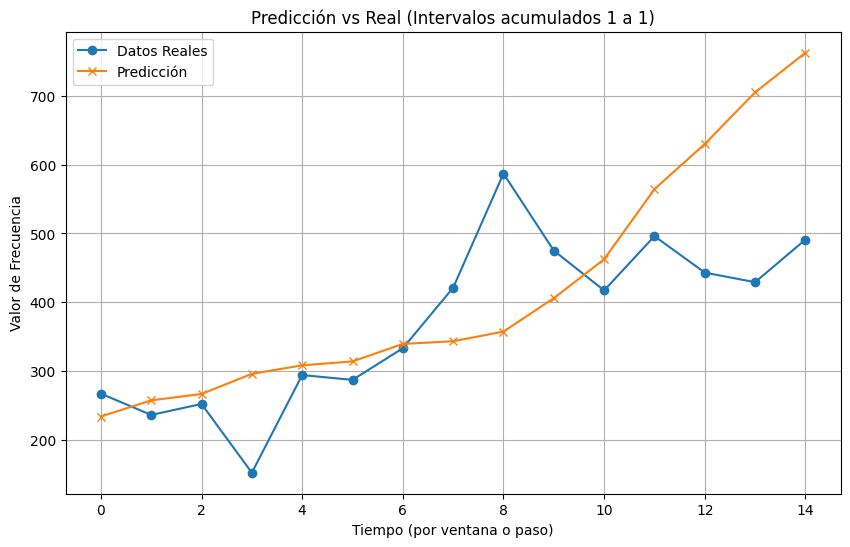

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Acumulando intervalos 1 a 2: MAE = 102.65, MSE = 15854.50


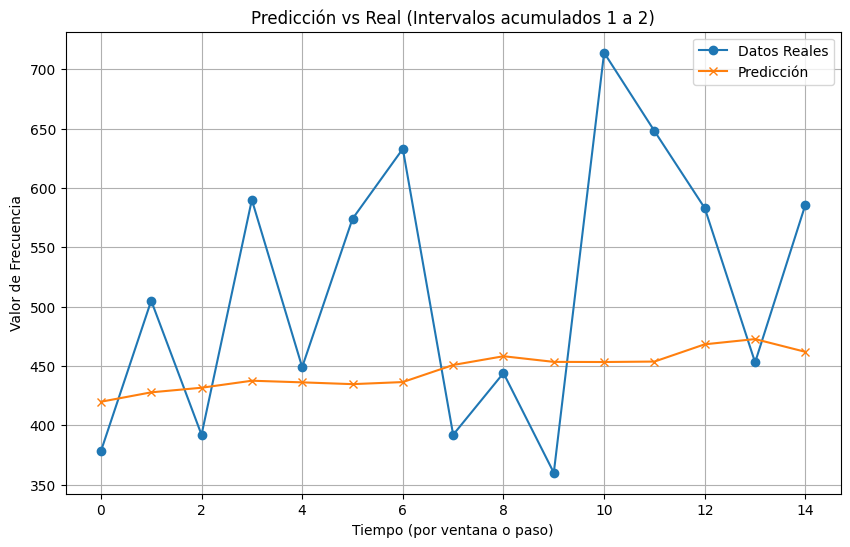

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Acumulando intervalos 1 a 3: MAE = 299.46, MSE = 141196.65


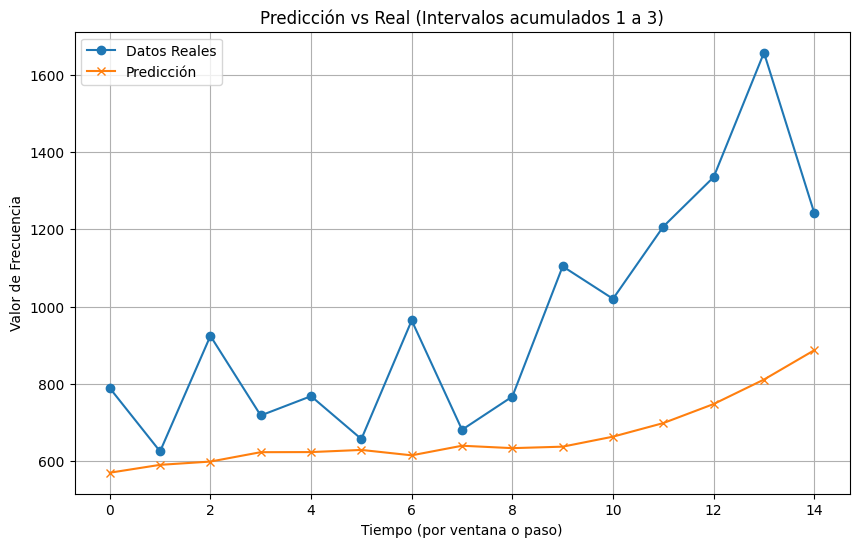

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Acumulando intervalos 1 a 4: MAE = 5.47, MSE = 42.52


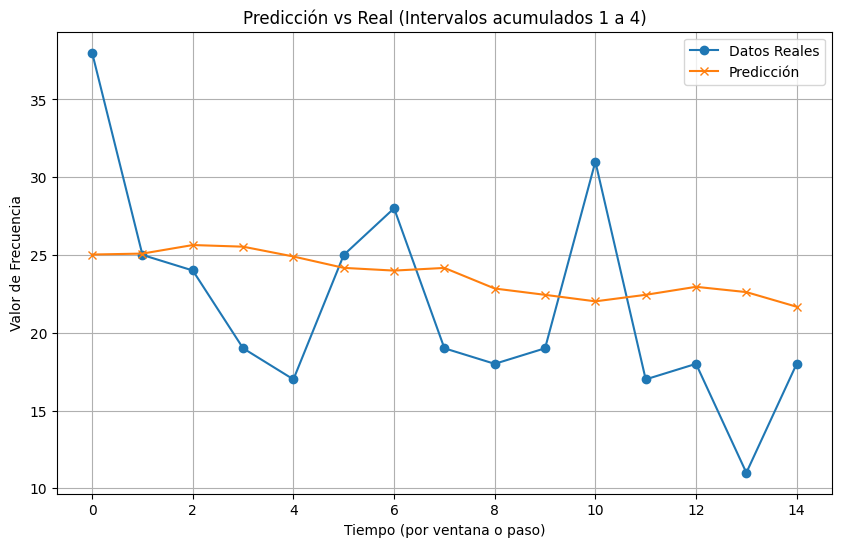

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Acumulando intervalos 1 a 5: MAE = 82.10, MSE = 10245.53


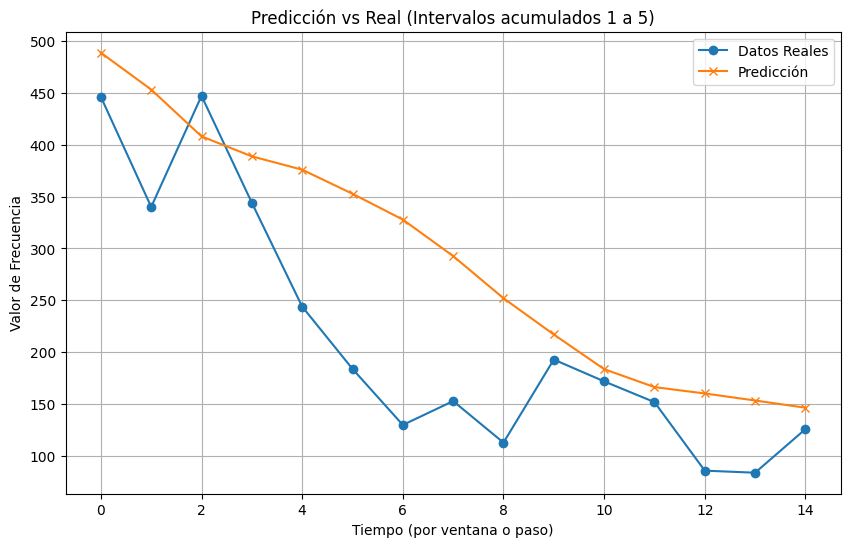

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Acumulando intervalos 1 a 6: MAE = 34.64, MSE = 1474.75


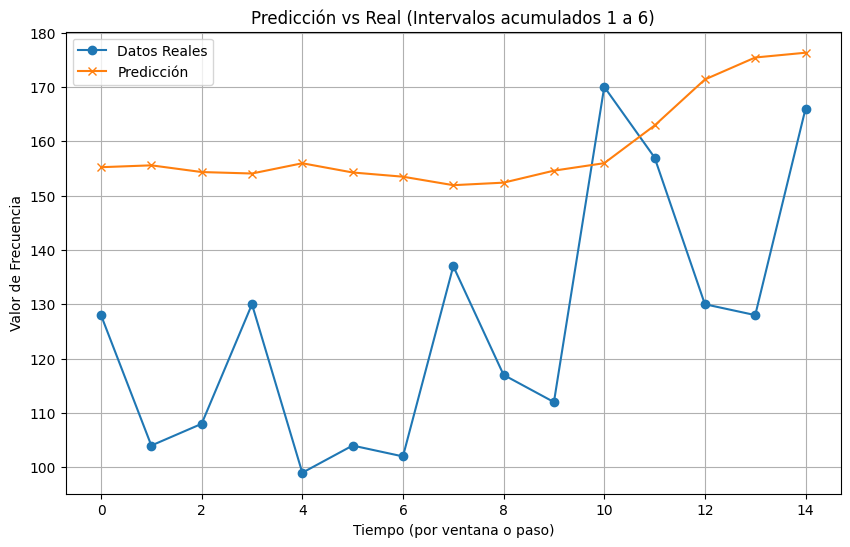

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Acumulando intervalos 1 a 7: MAE = 11.42, MSE = 271.78


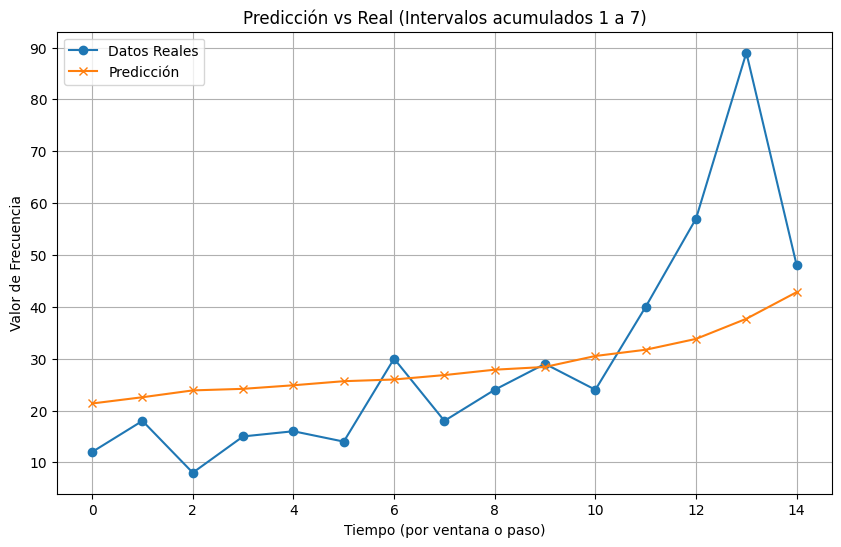

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Acumulando intervalos 1 a 8: MAE = 2.88, MSE = 12.02


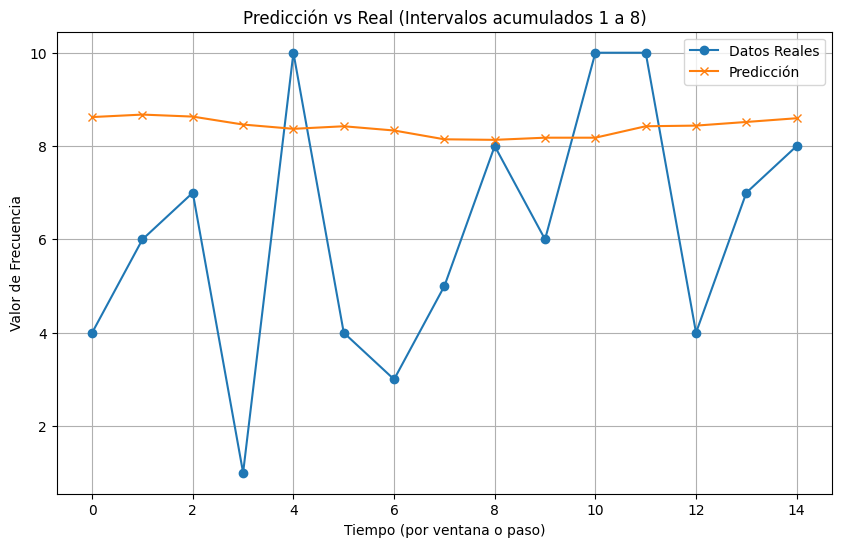


Resumen de métricas:
  Intervalos Acumulados         MAE            MSE      SMAPE
0      Intervalos 1 a 1   99.023150   18587.757999  22.803436
1      Intervalos 1 a 2  102.654810   15854.497477  20.227206
2      Intervalos 1 a 3  299.457080  141196.651767  33.156757
3      Intervalos 1 a 4    5.470643      42.518529  24.759921
4      Intervalos 1 a 5   82.098212   10245.525814  36.746931
5      Intervalos 1 a 6   34.643279    1474.750307  25.374127
6      Intervalos 1 a 7   11.418392     271.775677  39.228698
7      Intervalos 1 a 8    2.878685      12.021257  45.788580


In [21]:
# Parameters
WINDOW_SIZE = 7
HORIZONTE = 15 
EPOCHS = 50          
BATCH_SIZE = 16     

intervalos_ordenados = create_intervals(df)

resultados = []

# Inicializamos el escalador (se ajustará en cada iteración)
scaler = MinMaxScaler(feature_range=(0, 1))

# Bucle incremental para cada acumulación de intervalos
for i in range(len(intervalos_ordenados)):
   
    # Intervalos acumulados
    intervalos_incluir = intervalos_ordenados[:i+1]
    df_train = df[df['Intervalo'].isin(intervalos_incluir)]
    

    df_train = df_train.sort_values(by='Fecha')
    
    series = df_train['Frecuencia'].values.reshape(-1, 1)
    
    # Escalamos los datos
    series_scaled = scaler.fit_transform(series)
    
    # Recordar que para generar las ventanas se requieren window_size datos previos
    if len(series_scaled) <= WINDOW_SIZE + HORIZONTE:
        print(f"Iteración {i+1}: No hay suficientes datos para formar las ventanas (se requiere al menos {WINDOW_SIZE+HORIZONTE} datos)")
        continue
    
    train_data = series_scaled[:-HORIZONTE]
    test_data = series_scaled[-(HORIZONTE + WINDOW_SIZE):]  # Incluye la ventana previa para test
    
    # Generamos las secuencias (ventanas)
    x_train, y_train = create_windows(train_data, WINDOW_SIZE)
    x_test, y_test = create_windows(test_data, WINDOW_SIZE)
    
    # Reshape para que coincida con la entrada de LSTM: (muestras, window_size, 1)
    x_train = x_train.reshape(-1, WINDOW_SIZE, 1)
    x_test = x_test.reshape(-1, WINDOW_SIZE, 1)
    
    # Construimos y entrenamos el modelo
    model = build_lstm_model(WINDOW_SIZE)
    history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    
    # Hacemos la predicción para el conjunto test
    y_pred_scaled = model.predict(x_test)
    
    # Invertimos la transformación del escalador para volver a los valores originales
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    
    # Calculamos las métricas
    mae = mean_absolute_error(y_test_inv, y_pred)
    mse = mean_squared_error(y_test_inv, y_pred)
    smape_value = smape(y_test_inv, y_pred)

    resultados.append({
        'Intervalos Acumulados': f"Intervalos 1 a {i+1}",
        'MAE': mae,
        'MSE': mse,
        'SMAPE': smape_value
    })
    
    print(f"Acumulando intervalos 1 a {i+1}: MAE = {mae:.2f}, MSE = {mse:.2f}")
    
    # Graficar datos reales vs predicción para este intervalo
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_inv, label="Datos Reales", marker='o')
    plt.plot(y_pred, label="Predicción", marker='x')
    plt.title(f"Predicción vs Real (Intervalos acumulados 1 a {i+1})")
    plt.xlabel("Tiempo (por ventana o paso)")
    plt.ylabel("Valor de Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()


df_resultados = pd.DataFrame(resultados)
print("\nResumen de métricas:")
print(df_resultados) 

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Acumulando intervalos 1 a 1: MAE = 76.46, MSE = 11166.20


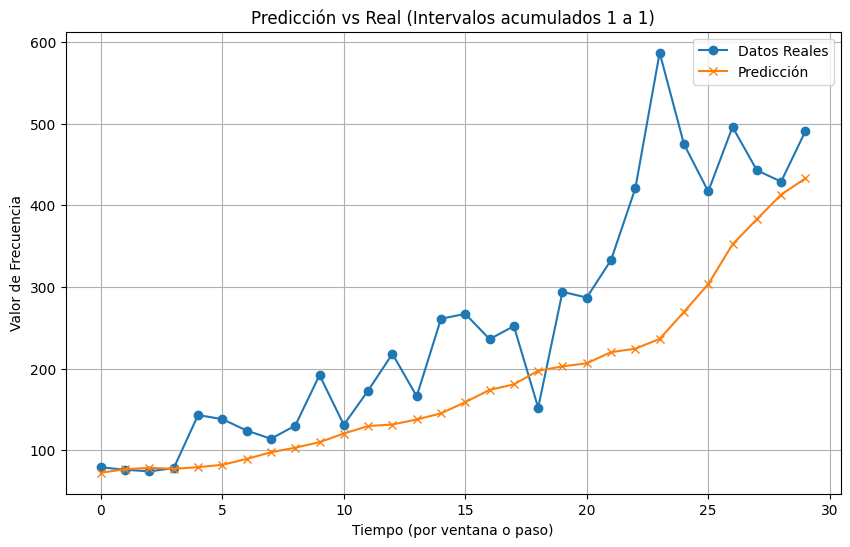

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Acumulando intervalos 1 a 2: MAE = 80.50, MSE = 9963.89


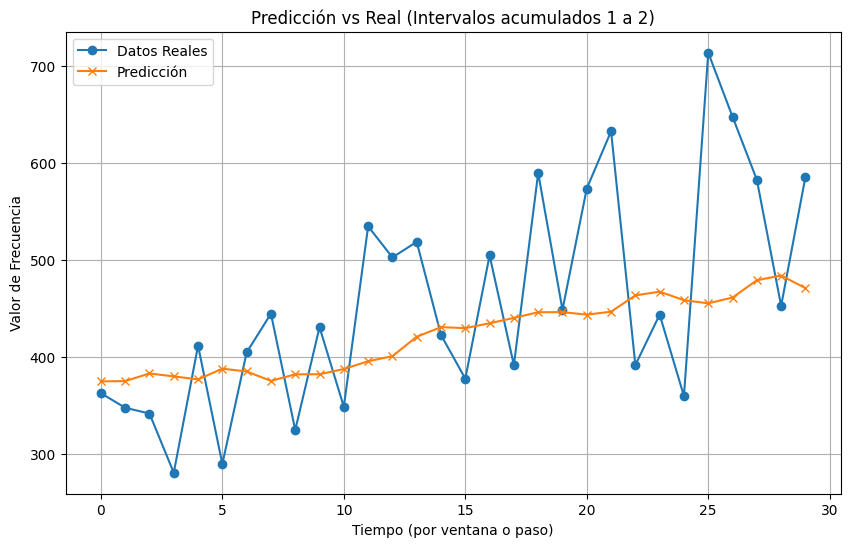

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Acumulando intervalos 1 a 3: MAE = 197.22, MSE = 69851.80


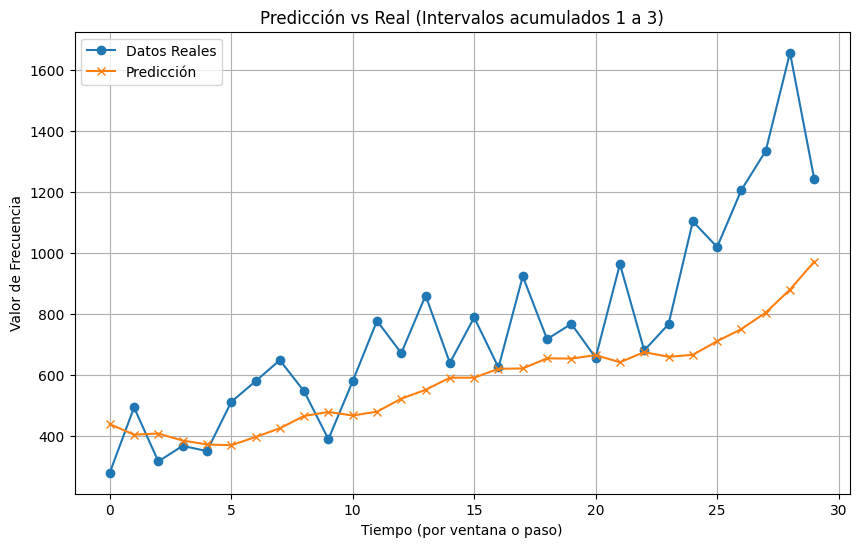

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Acumulando intervalos 1 a 4: MAE = 31.30, MSE = 1017.49


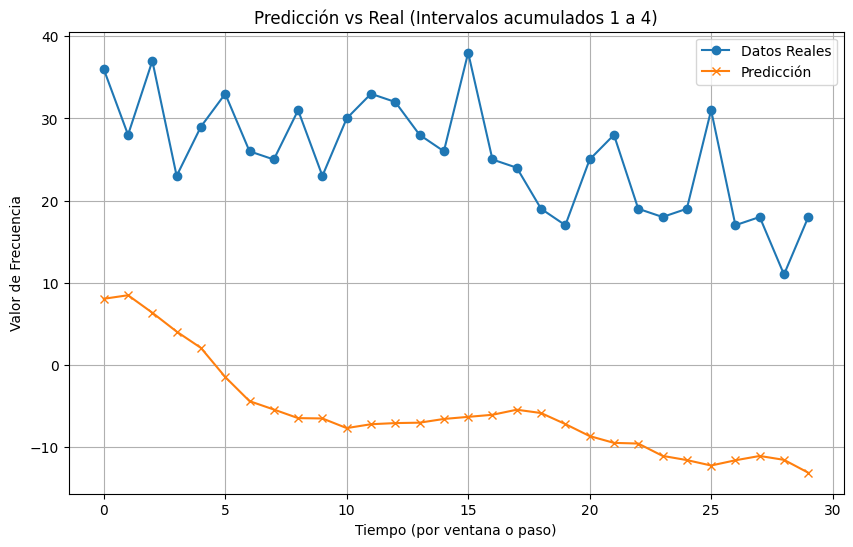

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Acumulando intervalos 1 a 5: MAE = 128.58, MSE = 24320.25


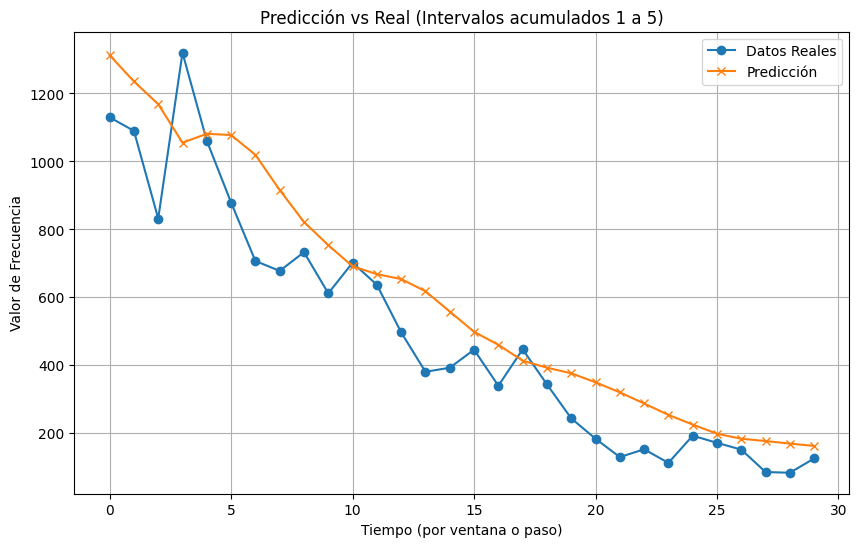

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Acumulando intervalos 1 a 6: MAE = 34.46, MSE = 1612.27


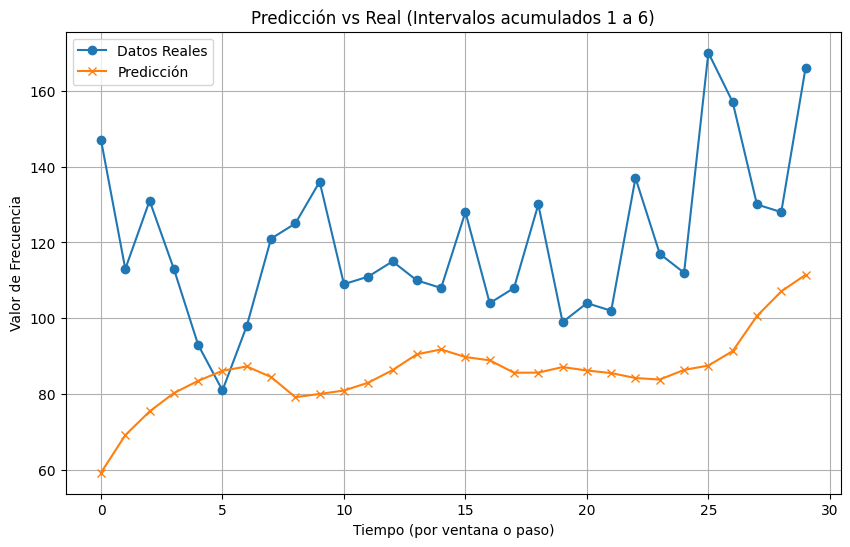

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Acumulando intervalos 1 a 7: MAE = 25.86, MSE = 902.32


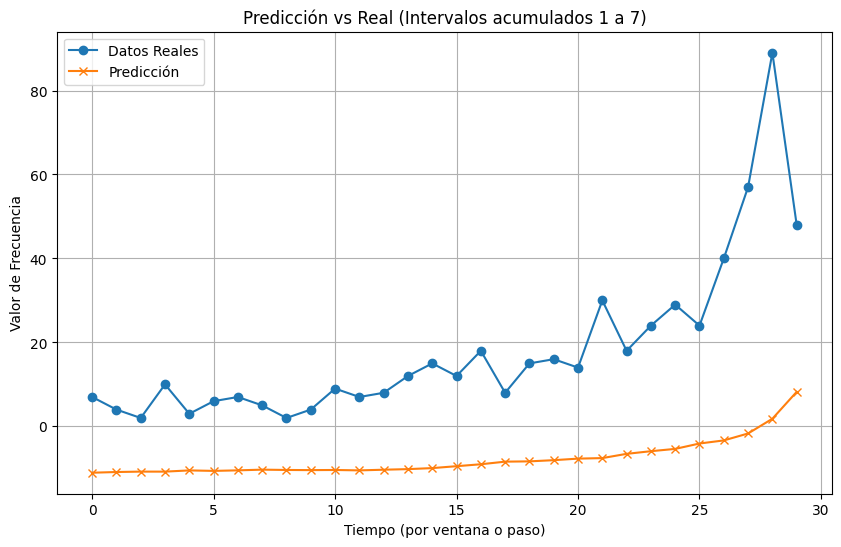

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Acumulando intervalos 1 a 8: MAE = 28.03, MSE = 793.49


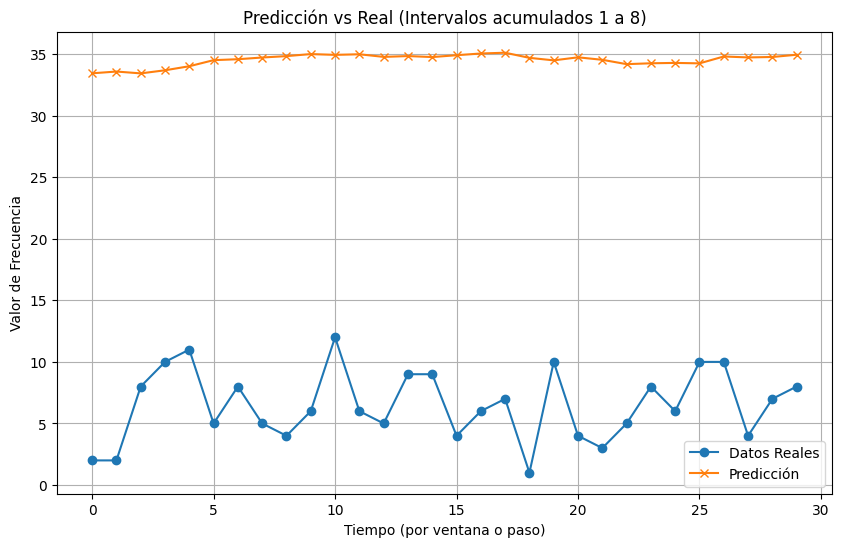


Resumen de métricas:
  Intervalos Acumulados         MAE           MSE       SMAPE
0      Intervalos 1 a 1   76.459901  11166.203148   32.042182
1      Intervalos 1 a 2   80.497786   9963.894641   17.505837
2      Intervalos 1 a 3  197.218609  69851.798572   27.021543
3      Intervalos 1 a 4   31.304727   1017.485863  189.637660
4      Intervalos 1 a 5  128.575120  24320.253368   30.704314
5      Intervalos 1 a 6   34.463668   1612.268778   32.446976
6      Intervalos 1 a 7   25.863609    902.323372  197.782595
7      Intervalos 1 a 8   28.025273    793.488740  138.252372


In [13]:
# Parameters
WINDOW_SIZE = 7 
HORIZONTE = 30 
EPOCHS = 50          
BATCH_SIZE = 16     

intervalos_ordenados = create_intervals(df)

resultados = []

# Inicializamos el escalador (se ajustará en cada iteración)
scaler = MinMaxScaler(feature_range=(0, 1))

# Bucle incremental para cada acumulación de intervalos
for i in range(len(intervalos_ordenados)):
   
    # Intervalos acumulados
    intervalos_incluir = intervalos_ordenados[:i+1]
    df_train = df[df['Intervalo'].isin(intervalos_incluir)]
    

    df_train = df_train.sort_values(by='Fecha')
    
    series = df_train['Frecuencia'].values.reshape(-1, 1)
    
    # Escalamos los datos
    series_scaled = scaler.fit_transform(series)
    
    # Recordar que para generar las ventanas se requieren window_size datos previos
    if len(series_scaled) <= WINDOW_SIZE + HORIZONTE:
        print(f"Iteración {i+1}: No hay suficientes datos para formar las ventanas (se requiere al menos {WINDOW_SIZE+HORIZONTE} datos)")
        continue
    
    train_data = series_scaled[:-HORIZONTE]
    test_data = series_scaled[-(HORIZONTE + WINDOW_SIZE):]  # Incluye la ventana previa para test
    
    # Generamos las secuencias (ventanas)
    x_train, y_train = create_windows(train_data, WINDOW_SIZE)
    x_test, y_test = create_windows(test_data, WINDOW_SIZE)
    
    # Reshape para que coincida con la entrada de LSTM: (muestras, window_size, 1)
    x_train = x_train.reshape(-1, WINDOW_SIZE, 1)
    x_test = x_test.reshape(-1, WINDOW_SIZE, 1)
    
    # Construimos y entrenamos el modelo
    model = build_lstm_model(WINDOW_SIZE)
    history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    
    # Hacemos la predicción para el conjunto test
    y_pred_scaled = model.predict(x_test)
    
    # Invertimos la transformación del escalador para volver a los valores originales
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    
    # Calculamos las métricas
    mae = mean_absolute_error(y_test_inv, y_pred)
    mse = mean_squared_error(y_test_inv, y_pred)
    smape_value = smape(y_test_inv, y_pred)

    resultados.append({
        'Intervalos Acumulados': f"Intervalos 1 a {i+1}",
        'MAE': mae,
        'MSE': mse,
        'SMAPE': smape_value
    })
    
    print(f"Acumulando intervalos 1 a {i+1}: MAE = {mae:.2f}, MSE = {mse:.2f}")
    
    # Graficar datos reales vs predicción para este intervalo
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_inv, label="Datos Reales", marker='o')
    plt.plot(y_pred, label="Predicción", marker='x')
    plt.title(f"Predicción vs Real (Intervalos acumulados 1 a {i+1})")
    plt.xlabel("Tiempo (por ventana o paso)")
    plt.ylabel("Valor de Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()


df_resultados = pd.DataFrame(resultados)
print("\nResumen de métricas:")
print(df_resultados) 

### Train for windows size = 14

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Acumulando intervalos 1 a 1: MAE = 162.64, MSE = 44781.05


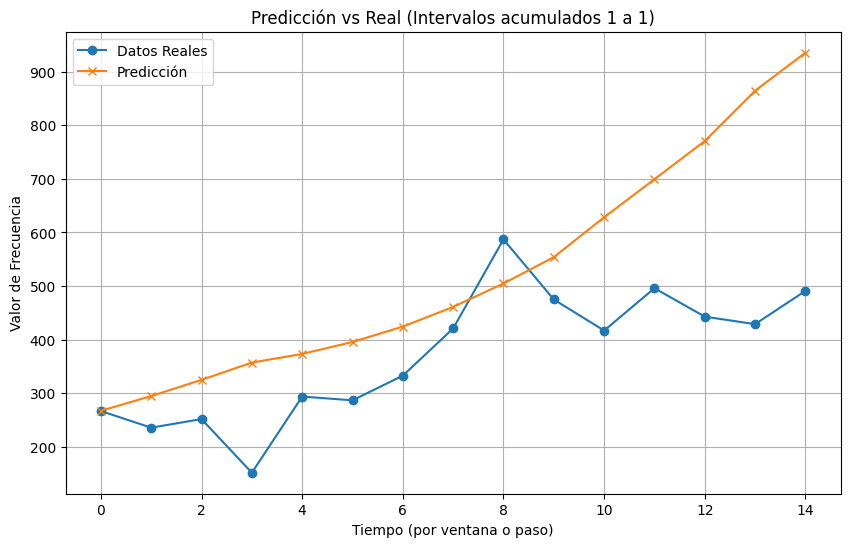

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Acumulando intervalos 1 a 2: MAE = 100.04, MSE = 14285.39


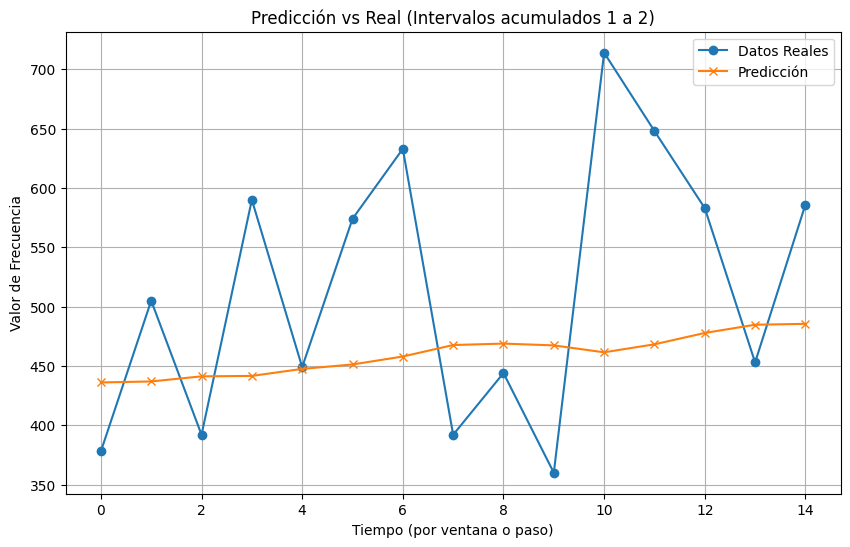

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Acumulando intervalos 1 a 3: MAE = 269.20, MSE = 122142.25


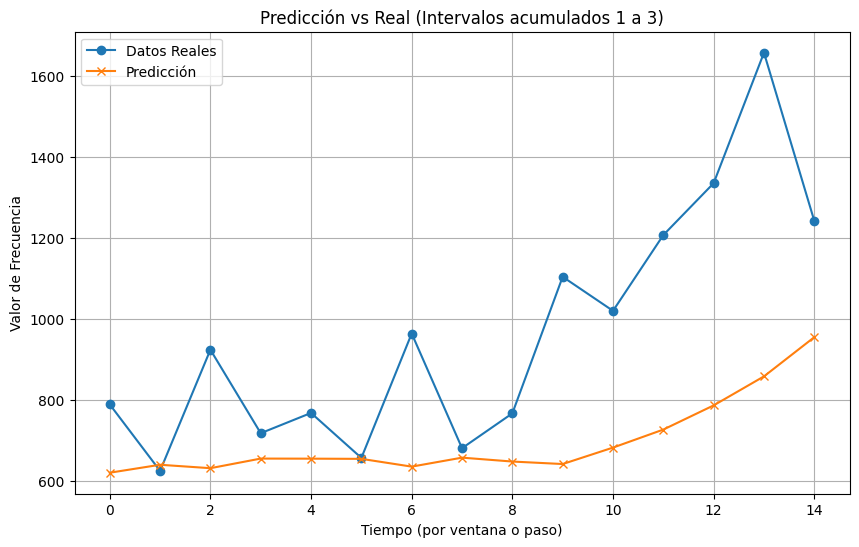

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Acumulando intervalos 1 a 4: MAE = 5.44, MSE = 40.65


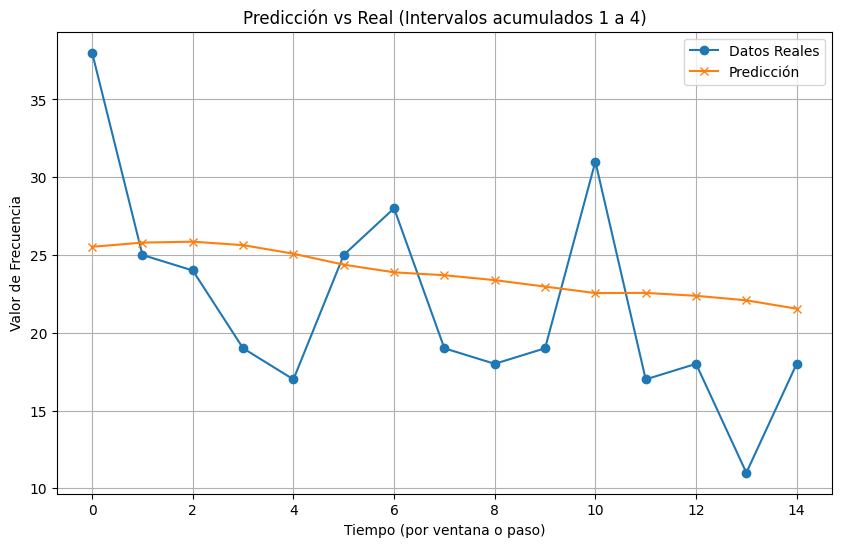

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Acumulando intervalos 1 a 5: MAE = 53.78, MSE = 4530.16


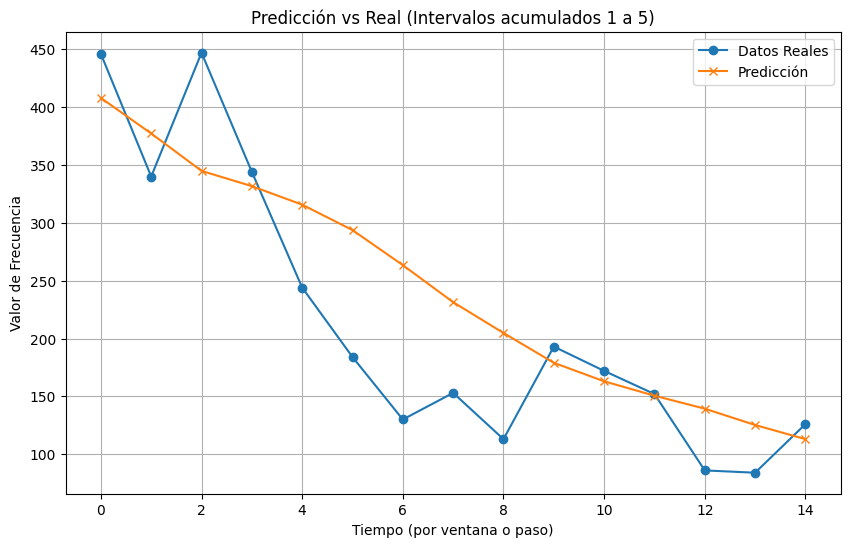

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Acumulando intervalos 1 a 6: MAE = 23.98, MSE = 747.93


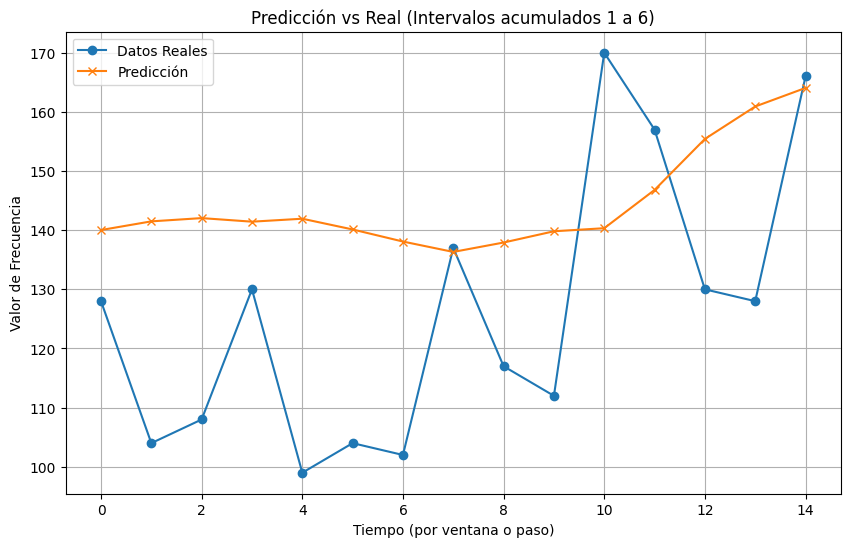

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Acumulando intervalos 1 a 7: MAE = 25.16, MSE = 716.45


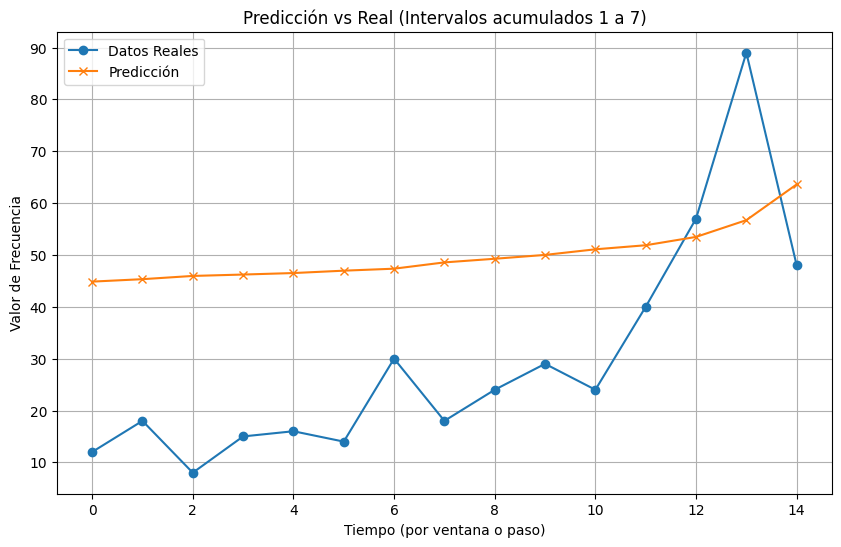

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Acumulando intervalos 1 a 8: MAE = 19.25, MSE = 378.15


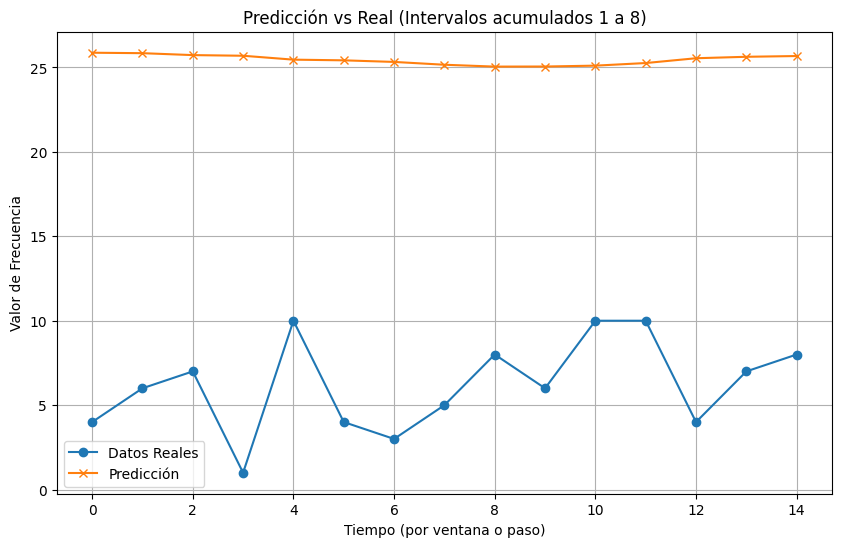


Resumen de métricas:
  Intervalos Acumulados         MAE            MSE       SMAPE
0      Intervalos 1 a 1  162.637075   44781.049304   33.703401
1      Intervalos 1 a 2  100.041742   14285.386592   19.680414
2      Intervalos 1 a 3  269.201139  122142.254975   28.940617
3      Intervalos 1 a 4    5.441559      40.653518   24.633384
4      Intervalos 1 a 5   53.777260    4530.156769   26.539670
5      Intervalos 1 a 6   23.979028     747.928879   18.471282
6      Intervalos 1 a 7   25.159289     716.446059   72.387472
7      Intervalos 1 a 8   19.252247     378.153516  123.873054


In [14]:
# Parameters
WINDOW_SIZE = 14 
HORIZONTE = 15 
EPOCHS = 50          
BATCH_SIZE = 16     

intervalos_ordenados = create_intervals(df)

resultados = []

# Inicializamos el escalador (se ajustará en cada iteración)
scaler = MinMaxScaler(feature_range=(0, 1))

# Bucle incremental para cada acumulación de intervalos
for i in range(len(intervalos_ordenados)):
   
    # Intervalos acumulados
    intervalos_incluir = intervalos_ordenados[:i+1]
    df_train = df[df['Intervalo'].isin(intervalos_incluir)]
    

    df_train = df_train.sort_values(by='Fecha')
    
    series = df_train['Frecuencia'].values.reshape(-1, 1)
    
    # Escalamos los datos
    series_scaled = scaler.fit_transform(series)
    
    # Recordar que para generar las ventanas se requieren window_size datos previos
    if len(series_scaled) <= WINDOW_SIZE + HORIZONTE:
        print(f"Iteración {i+1}: No hay suficientes datos para formar las ventanas (se requiere al menos {WINDOW_SIZE+HORIZONTE} datos)")
        continue
    
    train_data = series_scaled[:-HORIZONTE]
    test_data = series_scaled[-(HORIZONTE + WINDOW_SIZE):]  # Incluye la ventana previa para test
    
    # Generamos las secuencias (ventanas)
    x_train, y_train = create_windows(train_data, WINDOW_SIZE)
    x_test, y_test = create_windows(test_data, WINDOW_SIZE)
    
    # Reshape para que coincida con la entrada de LSTM: (muestras, window_size, 1)
    x_train = x_train.reshape(-1, WINDOW_SIZE, 1)
    x_test = x_test.reshape(-1, WINDOW_SIZE, 1)
    
    # Construimos y entrenamos el modelo
    model = build_lstm_model(WINDOW_SIZE)
    history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    
    # Hacemos la predicción para el conjunto test
    y_pred_scaled = model.predict(x_test)
    
    # Invertimos la transformación del escalador para volver a los valores originales
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    
    # Calculamos las métricas
    mae = mean_absolute_error(y_test_inv, y_pred)
    mse = mean_squared_error(y_test_inv, y_pred)
    smape_value = smape(y_test_inv, y_pred)

    resultados.append({
        'Intervalos Acumulados': f"Intervalos 1 a {i+1}",
        'MAE': mae,
        'MSE': mse,
        'SMAPE': smape_value
    })
    
    print(f"Acumulando intervalos 1 a {i+1}: MAE = {mae:.2f}, MSE = {mse:.2f}")
    
    # Graficar datos reales vs predicción para este intervalo
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_inv, label="Datos Reales", marker='o')
    plt.plot(y_pred, label="Predicción", marker='x')
    plt.title(f"Predicción vs Real (Intervalos acumulados 1 a {i+1})")
    plt.xlabel("Tiempo (por ventana o paso)")
    plt.ylabel("Valor de Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()


df_resultados = pd.DataFrame(resultados)
print("\nResumen de métricas:")
print(df_resultados) 

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Acumulando intervalos 1 a 1: MAE = 61.62, MSE = 9933.95


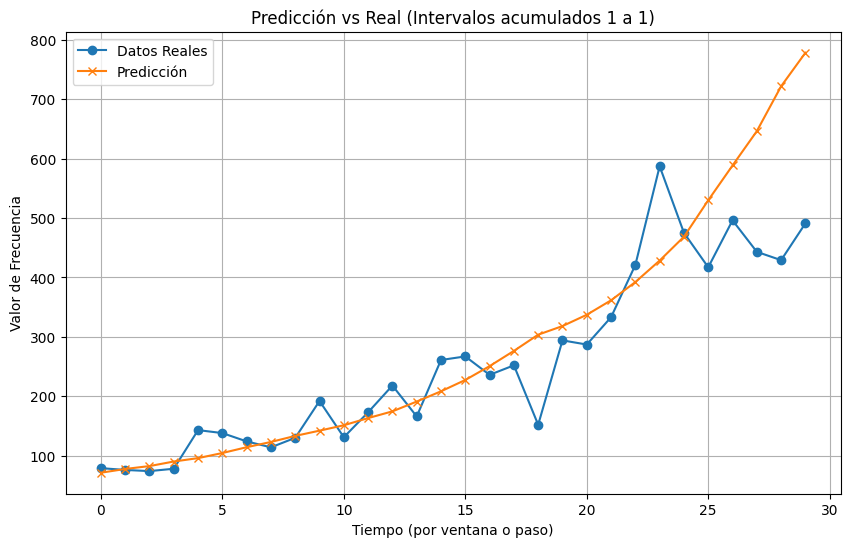

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Acumulando intervalos 1 a 2: MAE = 80.97, MSE = 9462.71


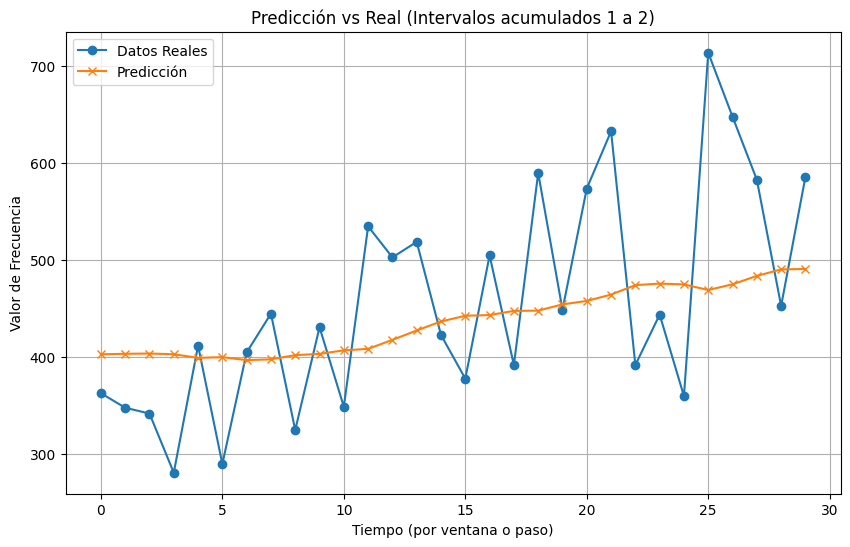

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Acumulando intervalos 1 a 3: MAE = 189.04, MSE = 65727.46


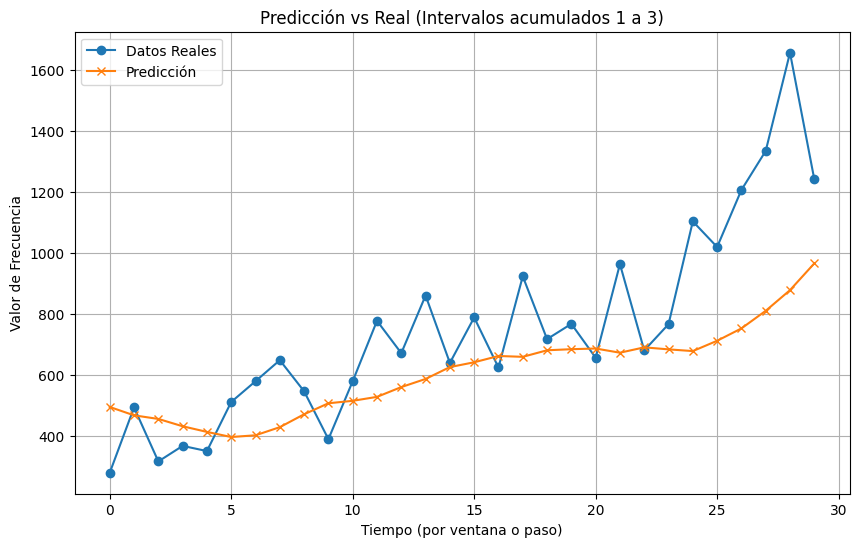

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Acumulando intervalos 1 a 4: MAE = 46.68, MSE = 2210.97


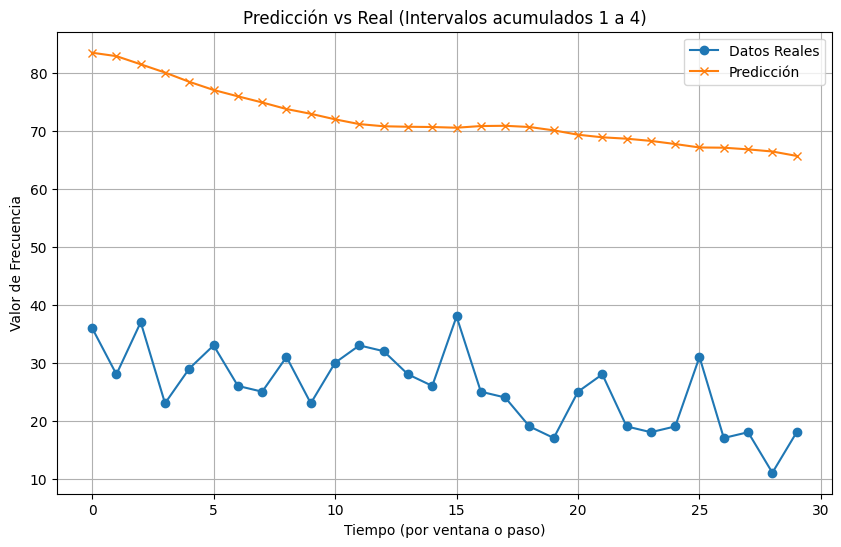

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Acumulando intervalos 1 a 5: MAE = 125.64, MSE = 24299.31


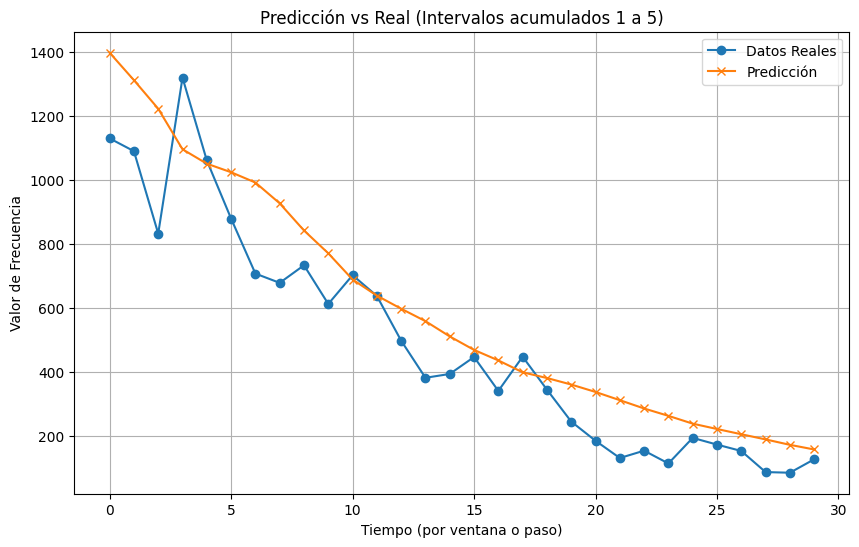

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Acumulando intervalos 1 a 6: MAE = 16.90, MSE = 558.98


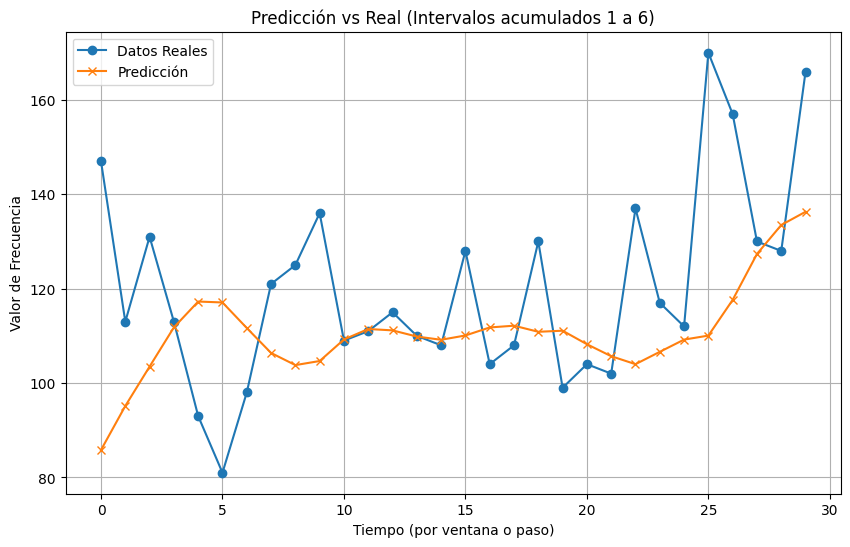

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Acumulando intervalos 1 a 7: MAE = 17.82, MSE = 581.47


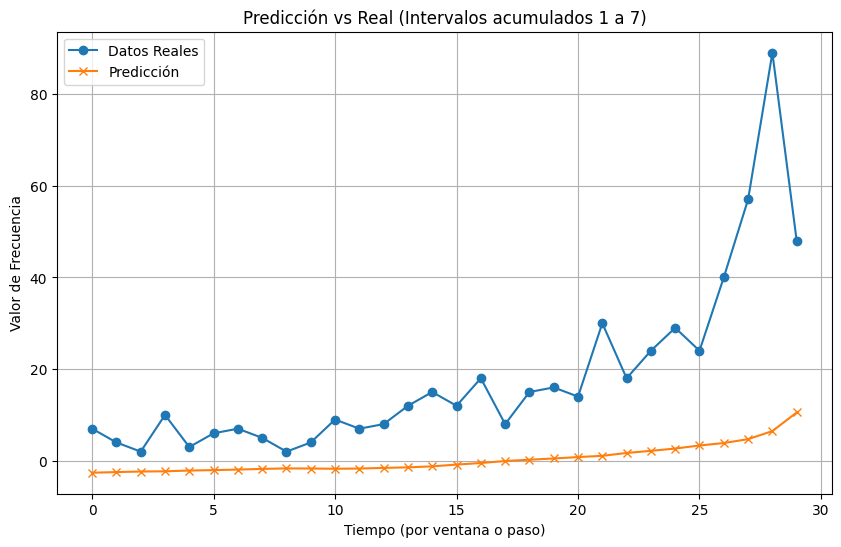

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Acumulando intervalos 1 a 8: MAE = 10.28, MSE = 113.87


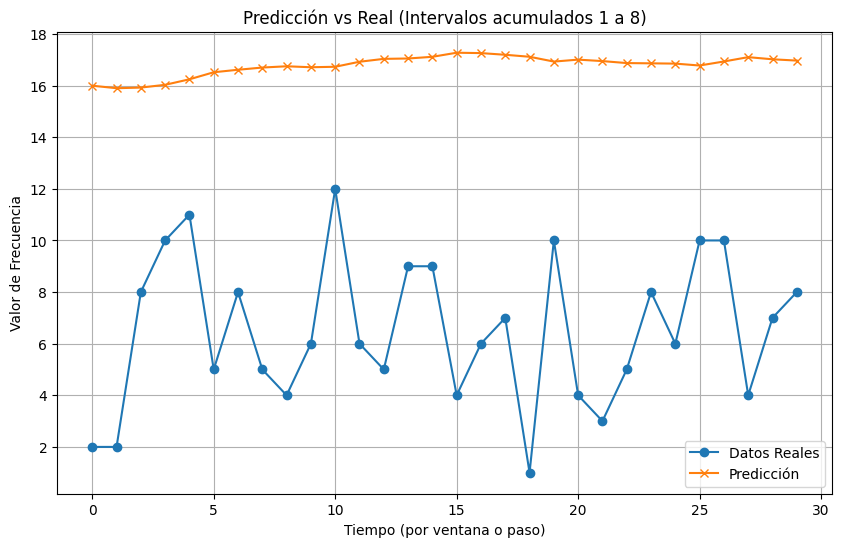


Resumen de métricas:
  Intervalos Acumulados         MAE           MSE       SMAPE
0      Intervalos 1 a 1   61.622607   9933.946187   19.187807
1      Intervalos 1 a 2   80.974514   9462.705614   17.675880
2      Intervalos 1 a 3  189.039386  65727.458792   25.813647
3      Intervalos 1 a 4   46.680924   2210.968582   96.982961
4      Intervalos 1 a 5  125.636016  24299.313640   30.242464
5      Intervalos 1 a 6   16.903487    558.978887   14.234266
6      Intervalos 1 a 7   17.824613    581.465885  187.674923
7      Intervalos 1 a 8   10.278358    113.866033   92.691128


In [15]:
# Parameters
WINDOW_SIZE = 14 
HORIZONTE = 30 
EPOCHS = 50          
BATCH_SIZE = 16     

intervalos_ordenados = create_intervals(df)

resultados = []

# Inicializamos el escalador (se ajustará en cada iteración)
scaler = MinMaxScaler(feature_range=(0, 1))

# Bucle incremental para cada acumulación de intervalos
for i in range(len(intervalos_ordenados)):
   
    # Intervalos acumulados
    intervalos_incluir = intervalos_ordenados[:i+1]
    df_train = df[df['Intervalo'].isin(intervalos_incluir)]
    

    df_train = df_train.sort_values(by='Fecha')
    
    series = df_train['Frecuencia'].values.reshape(-1, 1)
    
    # Escalamos los datos
    series_scaled = scaler.fit_transform(series)
    
    # Recordar que para generar las ventanas se requieren window_size datos previos
    if len(series_scaled) <= WINDOW_SIZE + HORIZONTE:
        print(f"Iteración {i+1}: No hay suficientes datos para formar las ventanas (se requiere al menos {WINDOW_SIZE+HORIZONTE} datos)")
        continue
    
    train_data = series_scaled[:-HORIZONTE]
    test_data = series_scaled[-(HORIZONTE + WINDOW_SIZE):]  # Incluye la ventana previa para test
    
    # Generamos las secuencias (ventanas)
    x_train, y_train = create_windows(train_data, WINDOW_SIZE)
    x_test, y_test = create_windows(test_data, WINDOW_SIZE)
    
    # Reshape para que coincida con la entrada de LSTM: (muestras, window_size, 1)
    x_train = x_train.reshape(-1, WINDOW_SIZE, 1)
    x_test = x_test.reshape(-1, WINDOW_SIZE, 1)
    
    # Construimos y entrenamos el modelo
    model = build_lstm_model(WINDOW_SIZE)
    history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    
    # Hacemos la predicción para el conjunto test
    y_pred_scaled = model.predict(x_test)
    
    # Invertimos la transformación del escalador para volver a los valores originales
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    
    # Calculamos las métricas
    mae = mean_absolute_error(y_test_inv, y_pred)
    mse = mean_squared_error(y_test_inv, y_pred)
    smape_value = smape(y_test_inv, y_pred)

    resultados.append({
        'Intervalos Acumulados': f"Intervalos 1 a {i+1}",
        'MAE': mae,
        'MSE': mse,
        'SMAPE': smape_value
    })
    
    print(f"Acumulando intervalos 1 a {i+1}: MAE = {mae:.2f}, MSE = {mse:.2f}")
    
    # Graficar datos reales vs predicción para este intervalo
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_inv, label="Datos Reales", marker='o')
    plt.plot(y_pred, label="Predicción", marker='x')
    plt.title(f"Predicción vs Real (Intervalos acumulados 1 a {i+1})")
    plt.xlabel("Tiempo (por ventana o paso)")
    plt.ylabel("Valor de Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()


df_resultados = pd.DataFrame(resultados)
print("\nResumen de métricas:")
print(df_resultados) 

### Train for windows size = 21


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Acumulando intervalos 1 a 1: MAE = 136.82, MSE = 33913.78


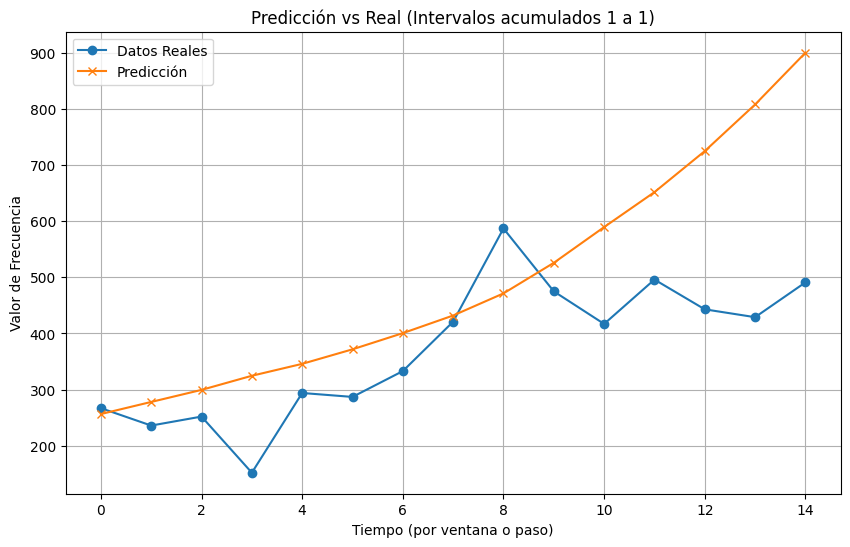

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Acumulando intervalos 1 a 2: MAE = 101.86, MSE = 15031.28


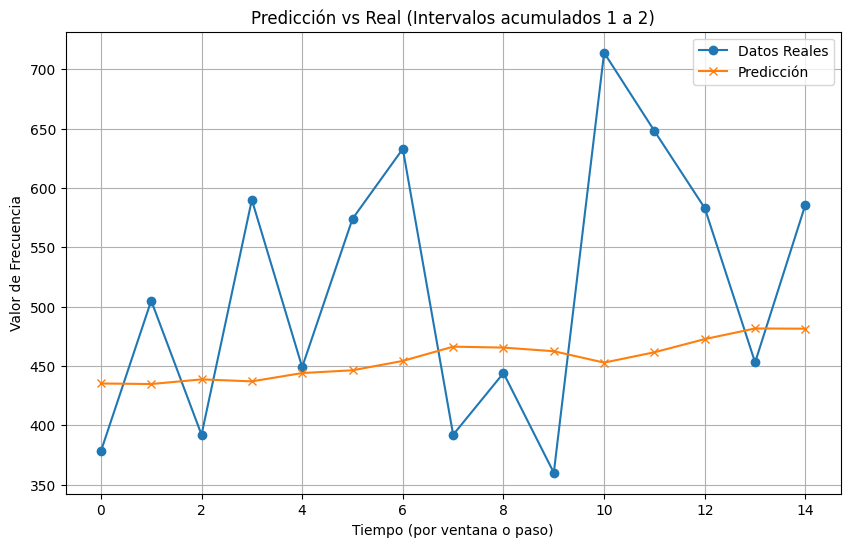

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Acumulando intervalos 1 a 3: MAE = 292.65, MSE = 139006.20


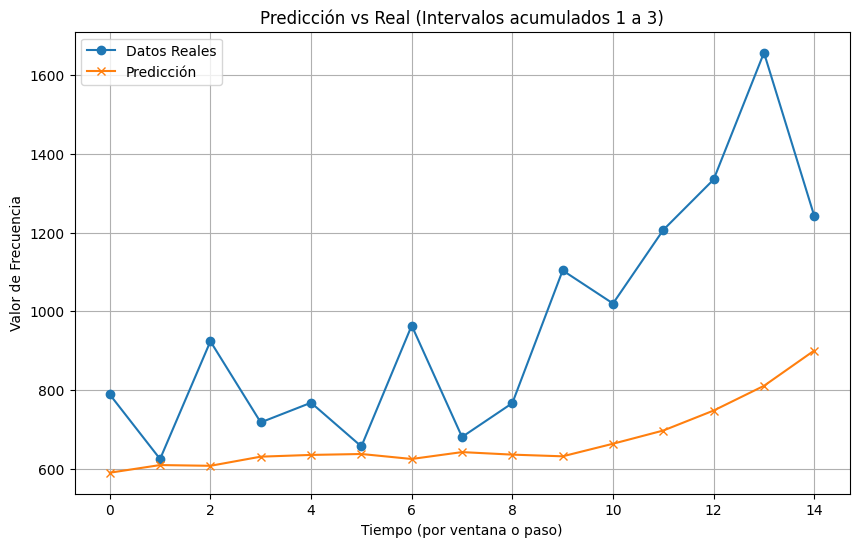

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Acumulando intervalos 1 a 4: MAE = 35.98, MSE = 1330.69


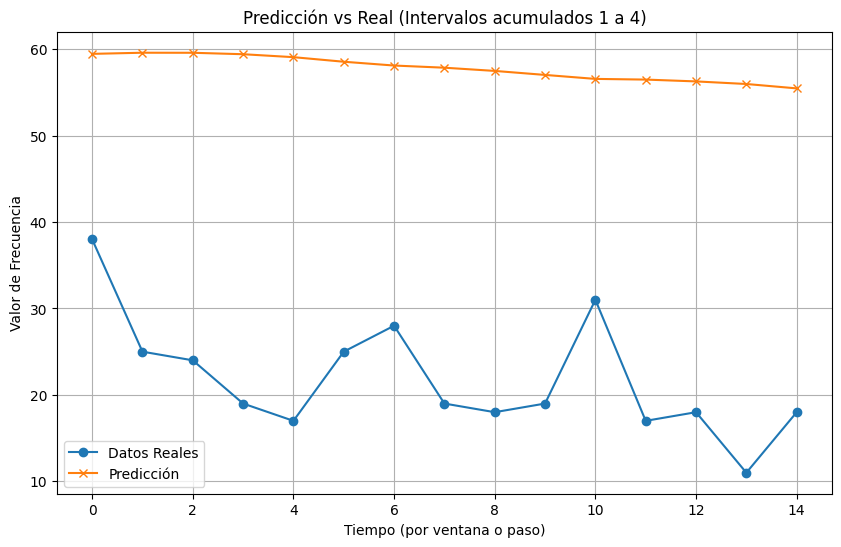

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Acumulando intervalos 1 a 5: MAE = 55.89, MSE = 4718.65


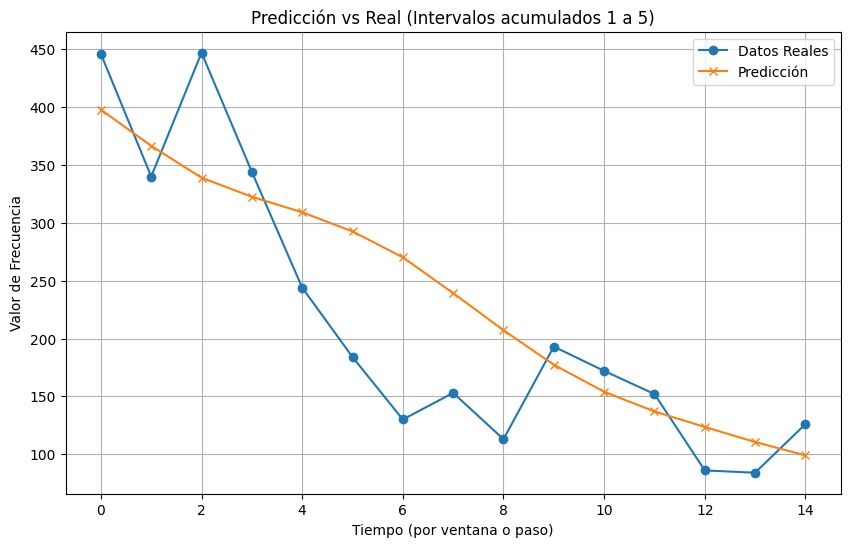

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Acumulando intervalos 1 a 6: MAE = 18.01, MSE = 435.22


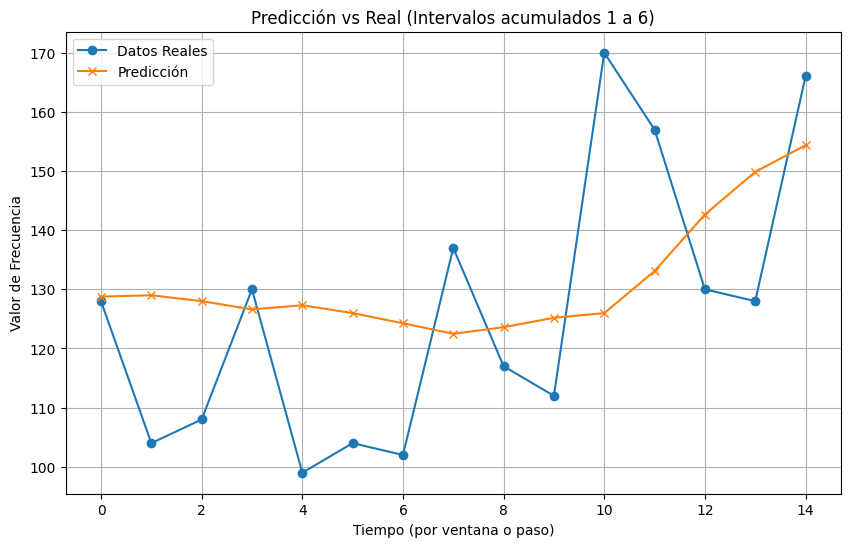

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Acumulando intervalos 1 a 7: MAE = 20.22, MSE = 495.62


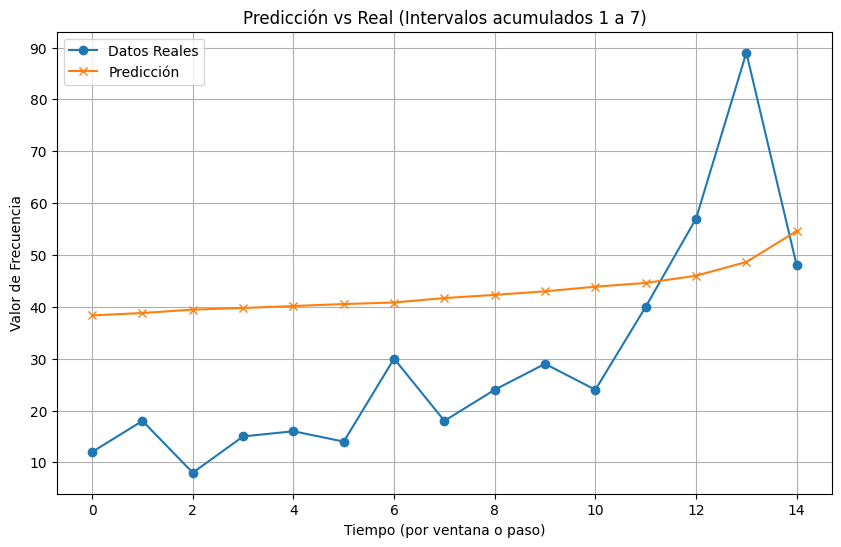

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Acumulando intervalos 1 a 8: MAE = 31.97, MSE = 1029.37


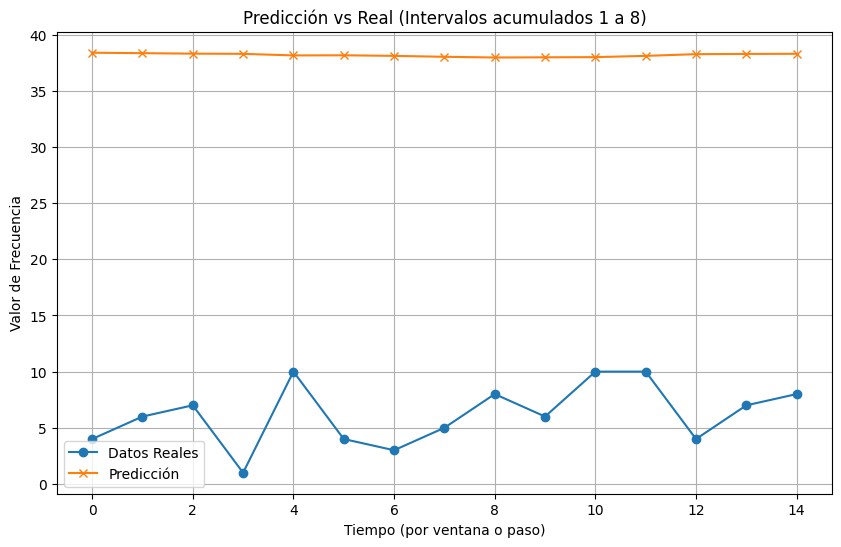


Resumen de métricas:
  Intervalos Acumulados         MAE            MSE       SMAPE
0      Intervalos 1 a 1  136.824542   33913.775703   28.985227
1      Intervalos 1 a 2  101.860514   15031.276467   20.067991
2      Intervalos 1 a 3  292.652079  139006.201661   32.100093
3      Intervalos 1 a 4   35.978061    1330.694748   92.370473
4      Intervalos 1 a 5   55.888765    4718.652567   27.459914
5      Intervalos 1 a 6   18.007588     435.216558   14.118768
6      Intervalos 1 a 7   20.218569     495.624087   63.369738
7      Intervalos 1 a 8   31.970976    1029.367269  145.322819


In [16]:
# Parameters
WINDOW_SIZE = 21 
HORIZONTE = 15 
EPOCHS = 50          
BATCH_SIZE = 16     

intervalos_ordenados = create_intervals(df)

resultados = []

# Inicializamos el escalador (se ajustará en cada iteración)
scaler = MinMaxScaler(feature_range=(0, 1))

# Bucle incremental para cada acumulación de intervalos
for i in range(len(intervalos_ordenados)):
   
    # Intervalos acumulados
    intervalos_incluir = intervalos_ordenados[:i+1]
    df_train = df[df['Intervalo'].isin(intervalos_incluir)]
    

    df_train = df_train.sort_values(by='Fecha')
    
    series = df_train['Frecuencia'].values.reshape(-1, 1)
    
    # Escalamos los datos
    series_scaled = scaler.fit_transform(series)
    
    # Recordar que para generar las ventanas se requieren window_size datos previos
    if len(series_scaled) <= WINDOW_SIZE + HORIZONTE:
        print(f"Iteración {i+1}: No hay suficientes datos para formar las ventanas (se requiere al menos {WINDOW_SIZE+HORIZONTE} datos)")
        continue
    
    train_data = series_scaled[:-HORIZONTE]
    test_data = series_scaled[-(HORIZONTE + WINDOW_SIZE):]  # Incluye la ventana previa para test
    
    # Generamos las secuencias (ventanas)
    x_train, y_train = create_windows(train_data, WINDOW_SIZE)
    x_test, y_test = create_windows(test_data, WINDOW_SIZE)
    
    # Reshape para que coincida con la entrada de LSTM: (muestras, window_size, 1)
    x_train = x_train.reshape(-1, WINDOW_SIZE, 1)
    x_test = x_test.reshape(-1, WINDOW_SIZE, 1)
    
    # Construimos y entrenamos el modelo
    model = build_lstm_model(WINDOW_SIZE)
    history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    
    # Hacemos la predicción para el conjunto test
    y_pred_scaled = model.predict(x_test)
    
    # Invertimos la transformación del escalador para volver a los valores originales
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    
    # Calculamos las métricas
    mae = mean_absolute_error(y_test_inv, y_pred)
    mse = mean_squared_error(y_test_inv, y_pred)
    smape_value = smape(y_test_inv, y_pred)

    resultados.append({
        'Intervalos Acumulados': f"Intervalos 1 a {i+1}",
        'MAE': mae,
        'MSE': mse,
        'SMAPE': smape_value
    })
    
    print(f"Acumulando intervalos 1 a {i+1}: MAE = {mae:.2f}, MSE = {mse:.2f}")
    
    # Graficar datos reales vs predicción para este intervalo
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_inv, label="Datos Reales", marker='o')
    plt.plot(y_pred, label="Predicción", marker='x')
    plt.title(f"Predicción vs Real (Intervalos acumulados 1 a {i+1})")
    plt.xlabel("Tiempo (por ventana o paso)")
    plt.ylabel("Valor de Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()


df_resultados = pd.DataFrame(resultados)
print("\nResumen de métricas:")
print(df_resultados) 

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Acumulando intervalos 1 a 1: MAE = 51.10, MSE = 5350.08


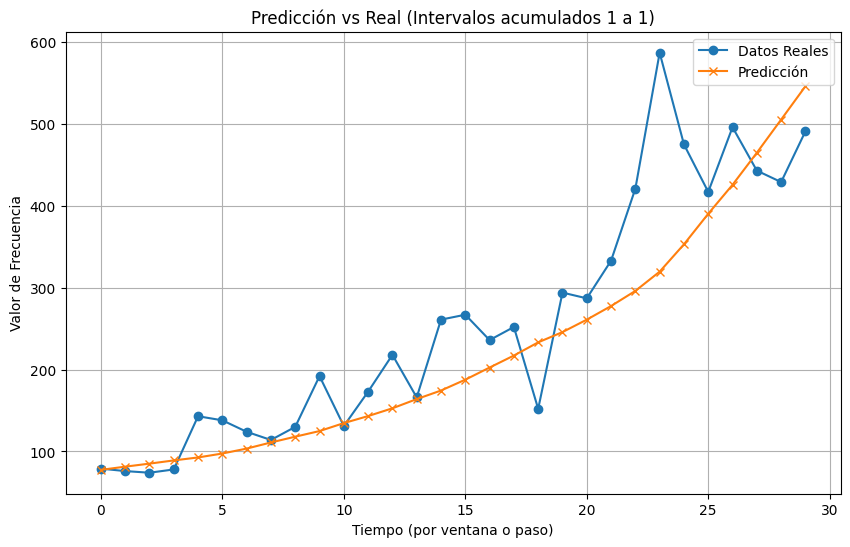

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Acumulando intervalos 1 a 2: MAE = 83.93, MSE = 11506.06


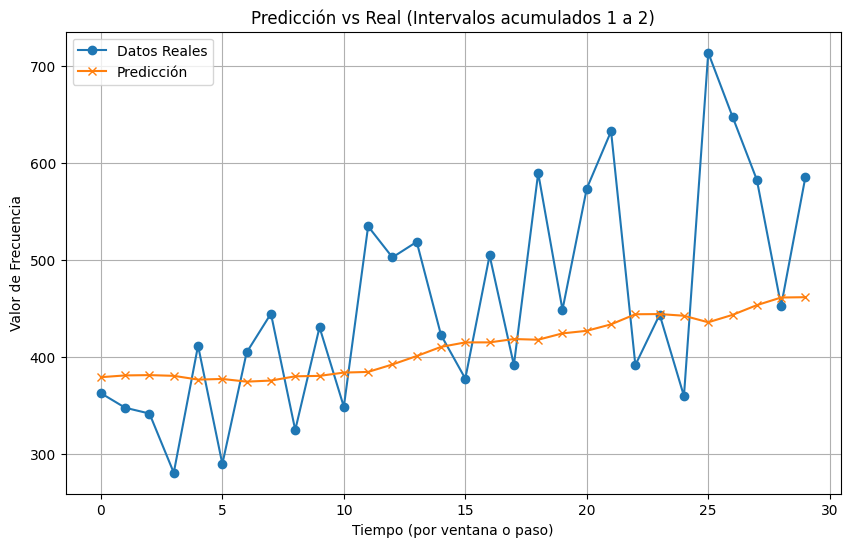

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Acumulando intervalos 1 a 3: MAE = 207.43, MSE = 78430.11


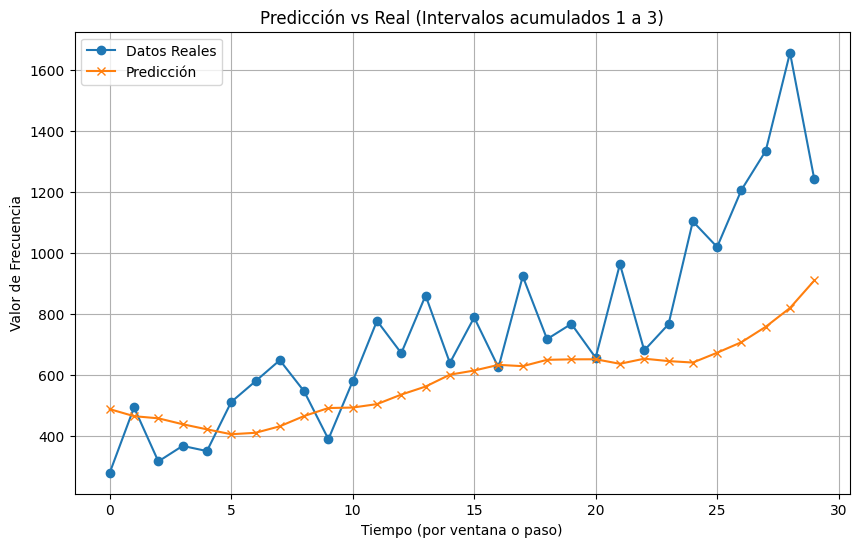

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Acumulando intervalos 1 a 4: MAE = 14.03, MSE = 226.73


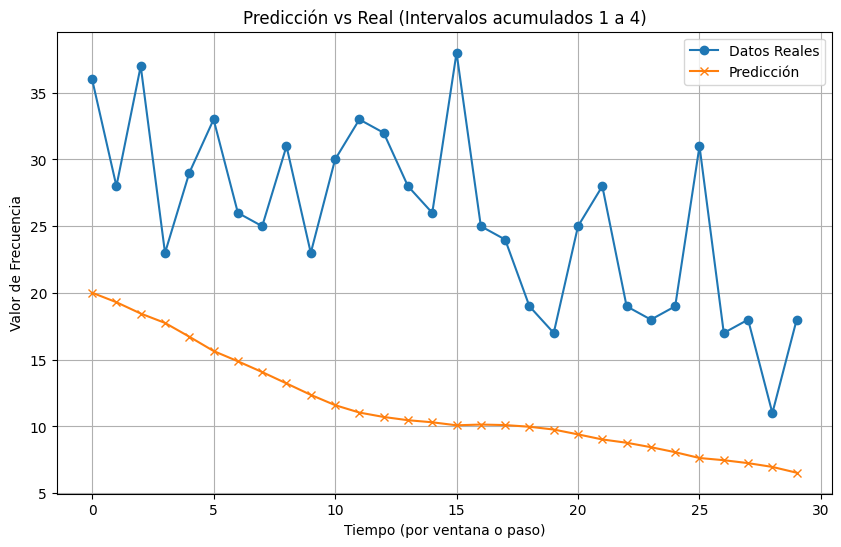

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Acumulando intervalos 1 a 5: MAE = 102.41, MSE = 18467.11


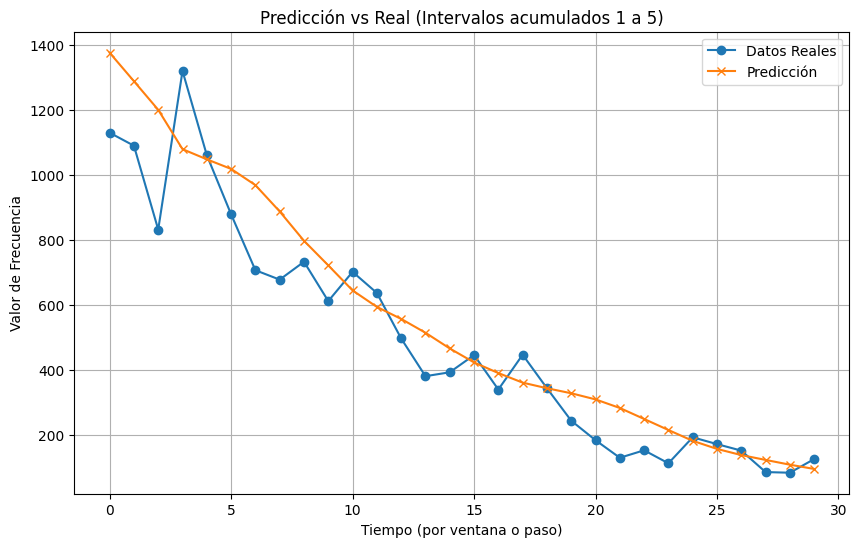

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Acumulando intervalos 1 a 6: MAE = 48.69, MSE = 2854.11


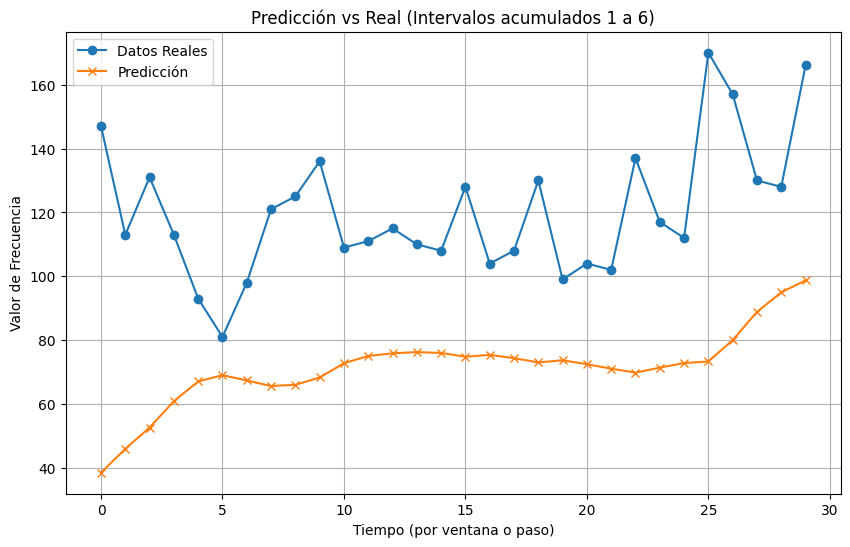

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Acumulando intervalos 1 a 7: MAE = 24.08, MSE = 659.02


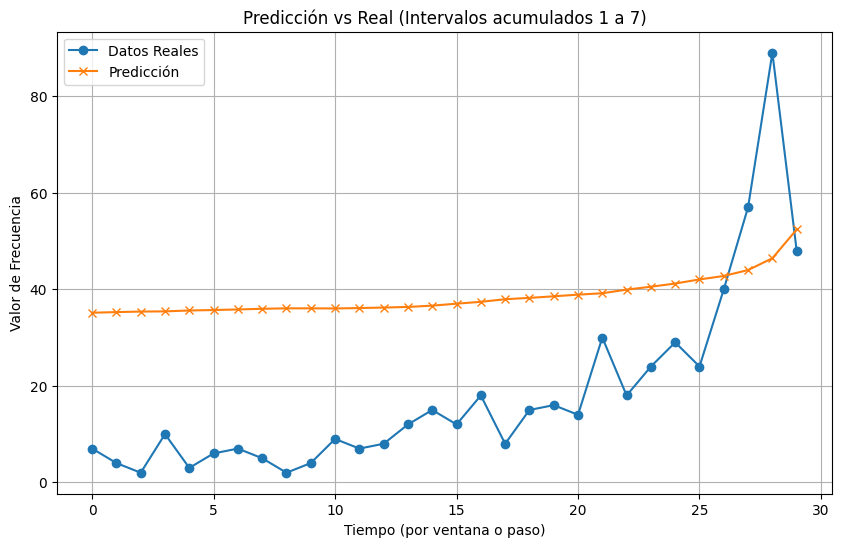

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Acumulando intervalos 1 a 8: MAE = 2.97, MSE = 12.77


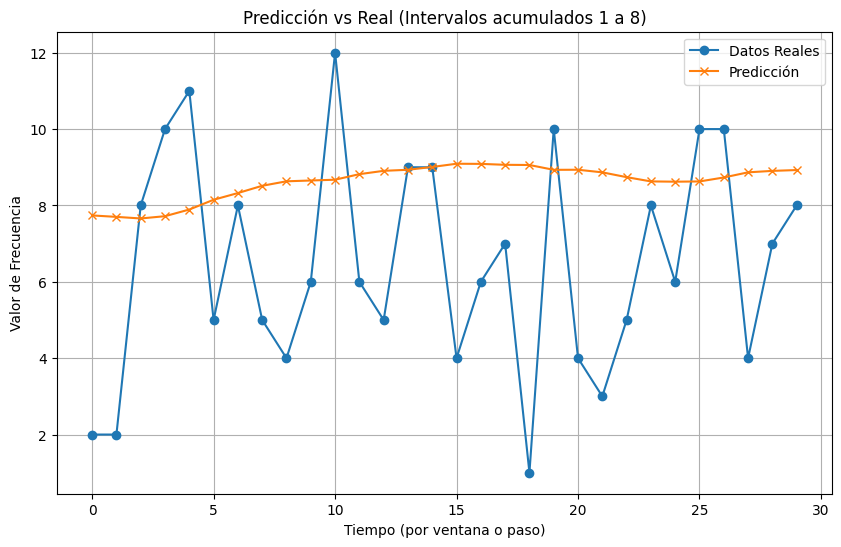


Resumen de métricas:
  Intervalos Acumulados         MAE           MSE       SMAPE
0      Intervalos 1 a 1   51.103697   5350.084456   20.446571
1      Intervalos 1 a 2   83.930304  11506.057119   18.305380
2      Intervalos 1 a 3  207.425996  78430.114936   28.372200
3      Intervalos 1 a 4   14.028749    226.733831   75.639447
4      Intervalos 1 a 5  102.405131  18467.113592   22.781503
5      Intervalos 1 a 6   48.694537   2854.110746   50.207212
6      Intervalos 1 a 7   24.076416    659.022033  100.001221
7      Intervalos 1 a 8    2.969152     12.769890   45.563323


In [22]:
# Parameters
WINDOW_SIZE = 21 
HORIZONTE = 30
EPOCHS = 50          
BATCH_SIZE = 16     

intervalos_ordenados = create_intervals(df)

resultados = []

# Inicializamos el escalador (se ajustará en cada iteración)
scaler = MinMaxScaler(feature_range=(0, 1))

# Bucle incremental para cada acumulación de intervalos
for i in range(len(intervalos_ordenados)):
   
    # Intervalos acumulados
    intervalos_incluir = intervalos_ordenados[:i+1]
    df_train = df[df['Intervalo'].isin(intervalos_incluir)]
    

    df_train = df_train.sort_values(by='Fecha')
    
    series = df_train['Frecuencia'].values.reshape(-1, 1)
    
    # Escalamos los datos
    series_scaled = scaler.fit_transform(series)
    
    # Recordar que para generar las ventanas se requieren window_size datos previos
    if len(series_scaled) <= WINDOW_SIZE + HORIZONTE:
        print(f"Iteración {i+1}: No hay suficientes datos para formar las ventanas (se requiere al menos {WINDOW_SIZE+HORIZONTE} datos)")
        continue
    
    train_data = series_scaled[:-HORIZONTE]
    test_data = series_scaled[-(HORIZONTE + WINDOW_SIZE):]  # Incluye la ventana previa para test
    
    # Generamos las secuencias (ventanas)
    x_train, y_train = create_windows(train_data, WINDOW_SIZE)
    x_test, y_test = create_windows(test_data, WINDOW_SIZE)
    
    # Reshape para que coincida con la entrada de LSTM: (muestras, window_size, 1)
    x_train = x_train.reshape(-1, WINDOW_SIZE, 1)
    x_test = x_test.reshape(-1, WINDOW_SIZE, 1)
    
    # Construimos y entrenamos el modelo
    model = build_lstm_model(WINDOW_SIZE)
    history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    
    # Hacemos la predicción para el conjunto test
    y_pred_scaled = model.predict(x_test)
    
    # Invertimos la transformación del escalador para volver a los valores originales
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    
    # Calculamos las métricas
    mae = mean_absolute_error(y_test_inv, y_pred)
    mse = mean_squared_error(y_test_inv, y_pred)
    smape_value = smape(y_test_inv, y_pred)

    resultados.append({
        'Intervalos Acumulados': f"Intervalos 1 a {i+1}",
        'MAE': mae,
        'MSE': mse,
        'SMAPE': smape_value
    })
    
    print(f"Acumulando intervalos 1 a {i+1}: MAE = {mae:.2f}, MSE = {mse:.2f}")
    
    # Graficar datos reales vs predicción para este intervalo
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_inv, label="Datos Reales", marker='o')
    plt.plot(y_pred, label="Predicción", marker='x')
    plt.title(f"Predicción vs Real (Intervalos acumulados 1 a {i+1})")
    plt.xlabel("Tiempo (por ventana o paso)")
    plt.ylabel("Valor de Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()


df_resultados = pd.DataFrame(resultados)
print("\nResumen de métricas:")
print(df_resultados) 

## TimesFM

In [24]:
import pandas as pd
import timesfm
import os
from huggingface_hub import login
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from dotenv import load_dotenv


load_dotenv()
hf_token = os.getenv("HUGGINGFACE_API_KEY")
# Log in with the token
login(token=hf_token)


Fetching 5 files: 100%|██████████| 5/5 [00:00<?, ?it/s]


Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 1: MAE = 161.83, MSE = 39464.28


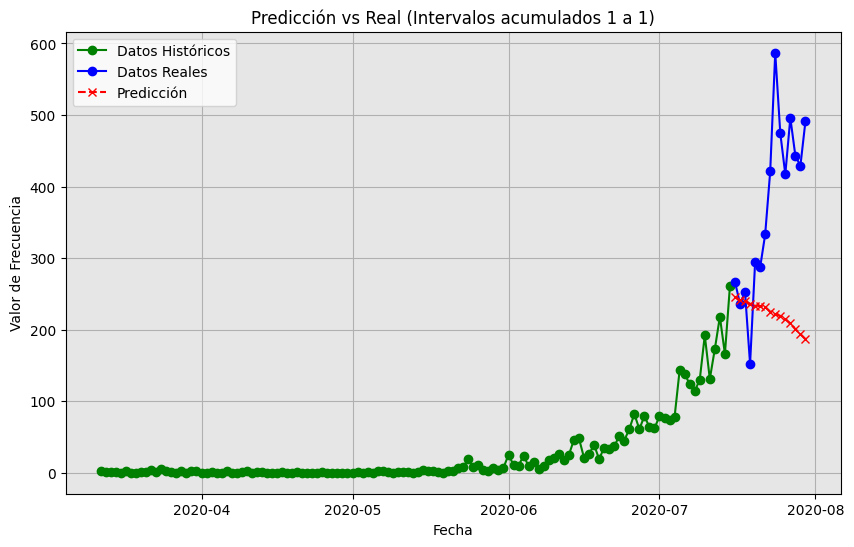

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 2: MAE = 182.36, MSE = 49539.47


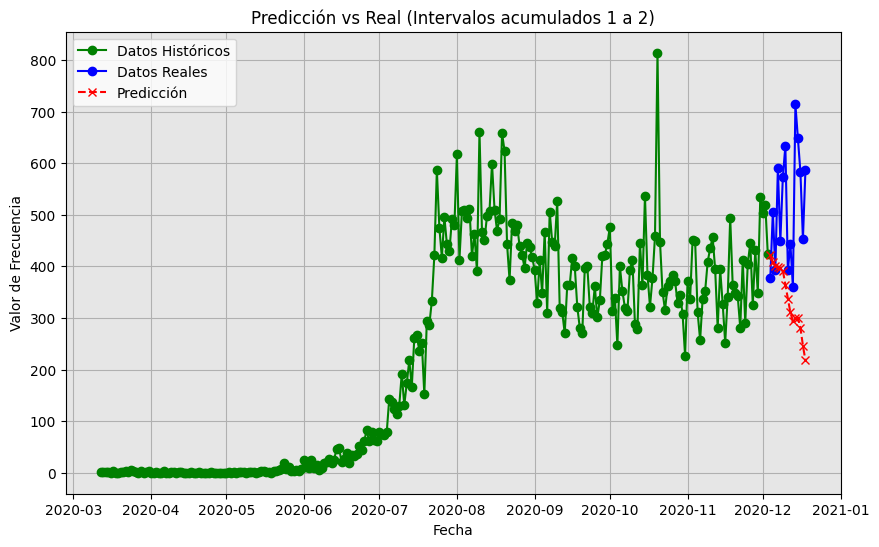

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 3: MAE = 325.83, MSE = 181618.79


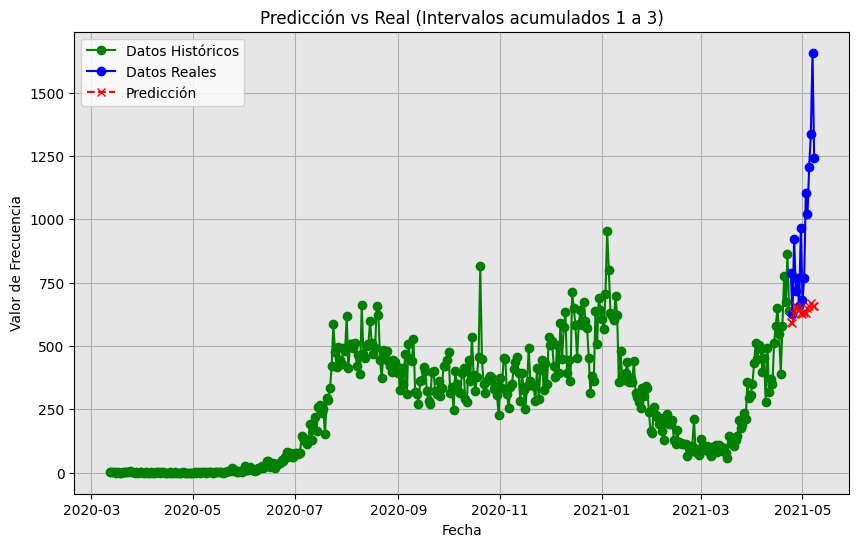

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 4: MAE = 24.57, MSE = 638.38


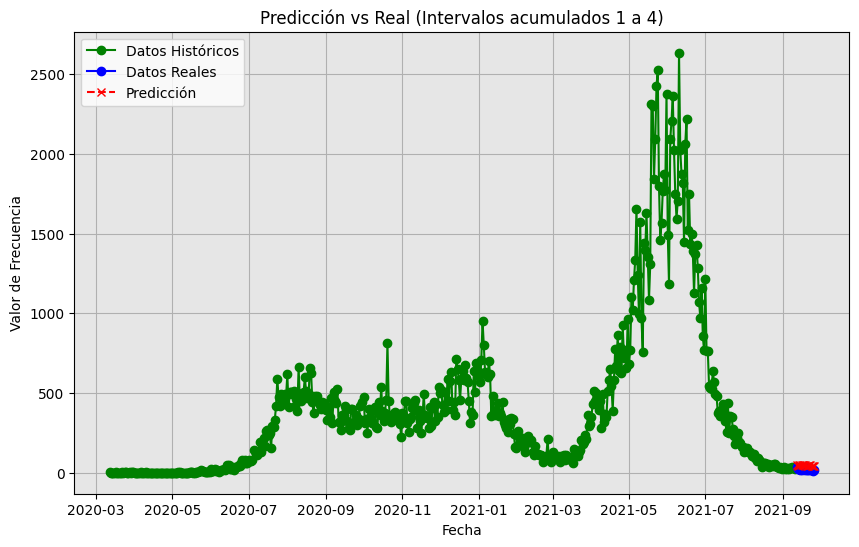

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 5: MAE = 71.05, MSE = 10091.89


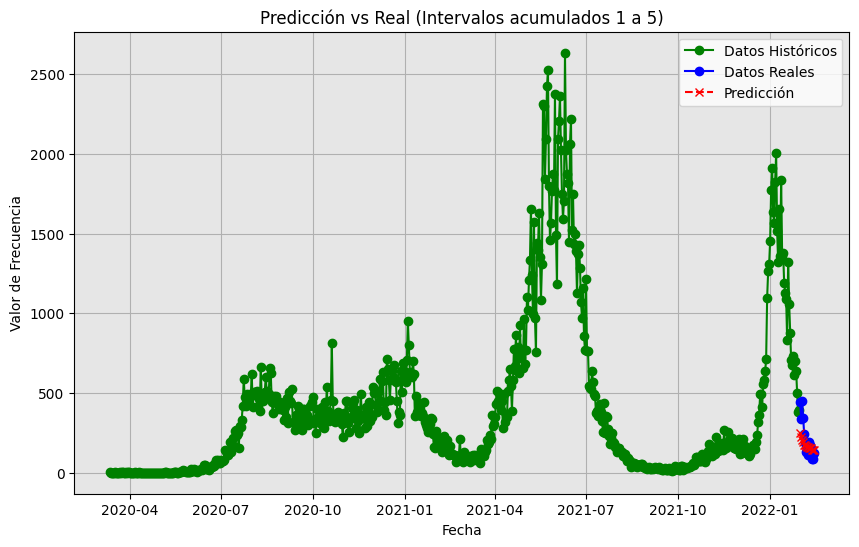

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 6: MAE = 147.89, MSE = 22724.88


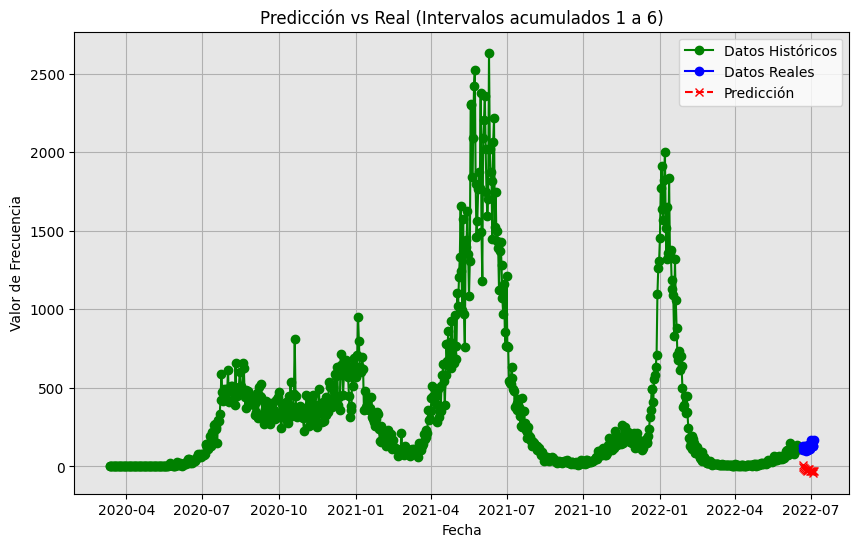

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 7: MAE = 333.50, MSE = 145953.74


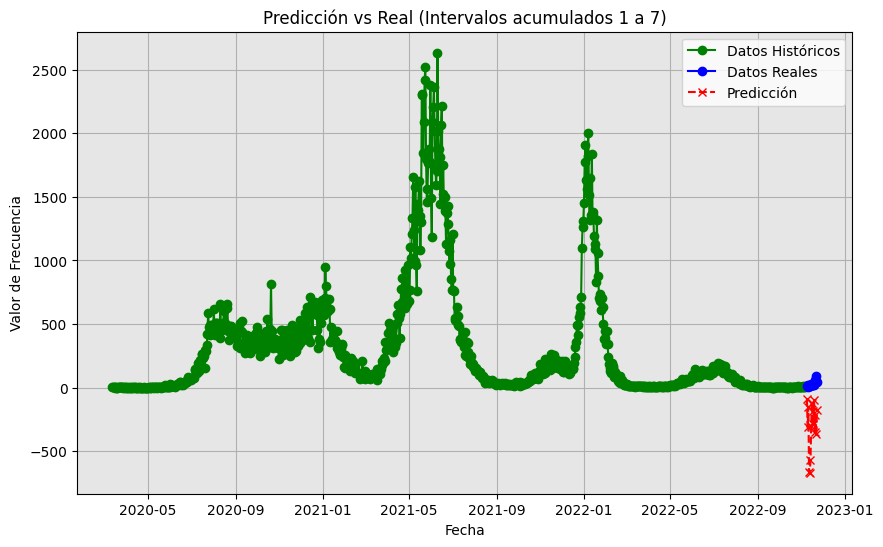

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 8: MAE = 42.47, MSE = 1823.03


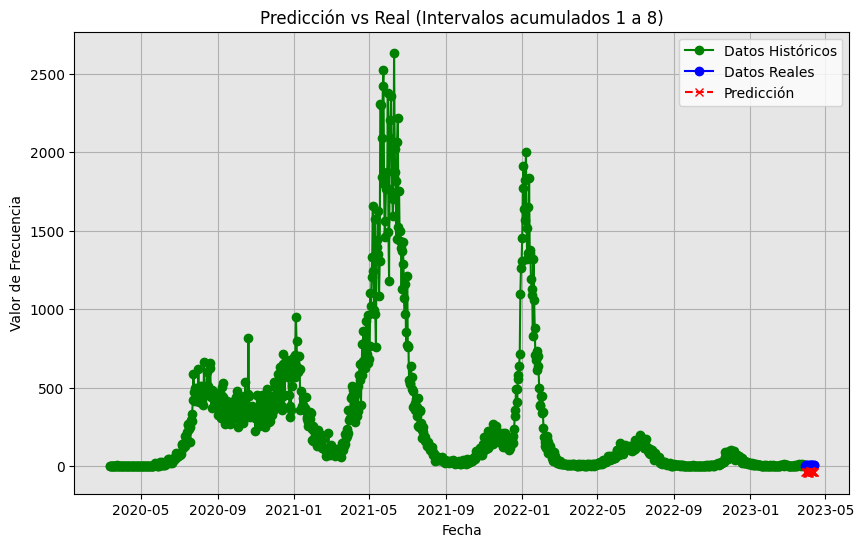


Resumen de métricas:
  Intervalos Acumulados         MAE            MSE       SMAPE
0      Intervalos 1 a 1  161.829240   39464.276278   49.960816
1      Intervalos 1 a 2  182.364549   49539.469451   41.527691
2      Intervalos 1 a 3  325.834245  181618.791114   36.126297
3      Intervalos 1 a 4   24.566073     638.379174   74.469446
4      Intervalos 1 a 5   71.046911   10091.892127   31.861175
5      Intervalos 1 a 6  147.889046   22724.882879  198.587984
6      Intervalos 1 a 7  333.495543  145953.743970  200.000000
7      Intervalos 1 a 8   42.473472    1823.031724  200.000000


In [31]:
# Parameters
HORIZONTE = 15 # falta el 30


resultados = []

intervalos_ordenados = create_intervals(df)

resultados = []

# Inicializamos el escalador (se ajustará en cada iteración)
scaler = MinMaxScaler(feature_range=(0, 1))

tfm = timesfm.TimesFm(
    hparams=timesfm.TimesFmHparams(
        backend="gpu",
        per_core_batch_size=32,
        horizon_len=HORIZONTE,
        num_layers=50
    ),
    checkpoint=timesfm.TimesFmCheckpoint(
        version='torch',
        huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
)

# Bucle incremental para cada acumulación de intervalos
for i in range(len(intervalos_ordenados)):
   
    # Intervalos acumulados
    intervalos_incluir = intervalos_ordenados[:i+1]

    df_final = df[df['Intervalo'].isin(intervalos_incluir)]
    
    series = df_final['Frecuencia'].values.reshape(-1, 1)

    # Inicializamos el escalador y escalamos la serie
    scaler = MinMaxScaler(feature_range=(0, 1))
    series_scaled = scaler.fit_transform(series)

    # Convertimos la serie escalada en un DataFrame
    df_scaled = pd.DataFrame(series_scaled, columns=['Frecuencia'])

    # Concatenamos la columna 'Fecha' con la columna escalada
    df_concatenado = pd.concat([df_final[['Fecha']].reset_index(drop=True), df_scaled], axis=1)

    df_train = df_concatenado.iloc[:-HORIZONTE].copy()
    df_test = df_concatenado.iloc[-HORIZONTE:].copy()

    # df_train = df_final.iloc[:-HORIZONTE].copy()
    # df_test = df_final.iloc[-HORIZONTE:].copy()

    # Preparing the data for training

    data_hist = df_train[['Fecha', 'Frecuencia']].rename(columns={
        'Fecha': 'ds',
        'Frecuencia': 'sales'
    })
    data_hist["unique_id"] = "series_1"

    forecast_df = tfm.forecast_on_df(
        inputs=data_hist,
        freq='D',
        forecast_context_len= len(data_hist),
        value_name='sales',
        num_jobs=-1)
    
    # 6. Alinear fechas y calcular métricas

    y_true = df_test['Frecuencia']
    y_pred = forecast_df['timesfm']
    
    y_pred = scaler.inverse_transform(y_pred.values.reshape(-1, 1))
    y_true = scaler.inverse_transform(y_true.values.reshape(-1, 1))


    # Calculamos las métricas
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    smape_value = smape(y_true, y_pred)

    resultados.append({
        'Intervalos Acumulados': f"Intervalos 1 a {i+1}",
        'MAE': mae,
        'MSE': mse,
        'SMAPE': smape_value
    })
    
    print(f"Acumulando intervalos 1 a {i+1}: MAE = {mae:.2f}, MSE = {mse:.2f}")
    
    # Graficar datos históricos, datos reales (test) y predicción sobre el intervalo completo
    fig, ax = plt.subplots(figsize=(10, 6))
    # Cambiar el color de fondo del eje a un gris suave
    ax.set_facecolor('#e6e6e6')  # Puedes ajustar el código hexadecimal para obtener el gris deseado

    # Graficar datos históricos (entrenamiento)
    # Aquí se vuelven a invertir las escalas para graficar los valores reales
    historico = scaler.inverse_transform(df_train['Frecuencia'].values.reshape(-1, 1))
    ax.plot(df_train['Fecha'], historico, label="Datos Históricos", marker='o', color='green')

    # Graficar datos reales del test (último intervalo)
    ax.plot(df_test['Fecha'], y_true, label="Datos Reales", marker='o', color='blue')

    # Graficar la predicción
    ax.plot(df_test['Fecha'], y_pred, label="Predicción", marker='x', linestyle='--', color='red')

    # Etiquetas y detalles de la gráfica
    ax.set_title(f"Predicción vs Real (Intervalos acumulados 1 a {i+1})")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Valor de Frecuencia")
    ax.legend()
    ax.grid(True)

    plt.show()



df_resultados = pd.DataFrame(resultados)
print("\nResumen de métricas:")
print(df_resultados) 


Fetching 5 files: 100%|██████████| 5/5 [00:00<?, ?it/s]


Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 1: MAE = 198.98, MSE = 63915.79


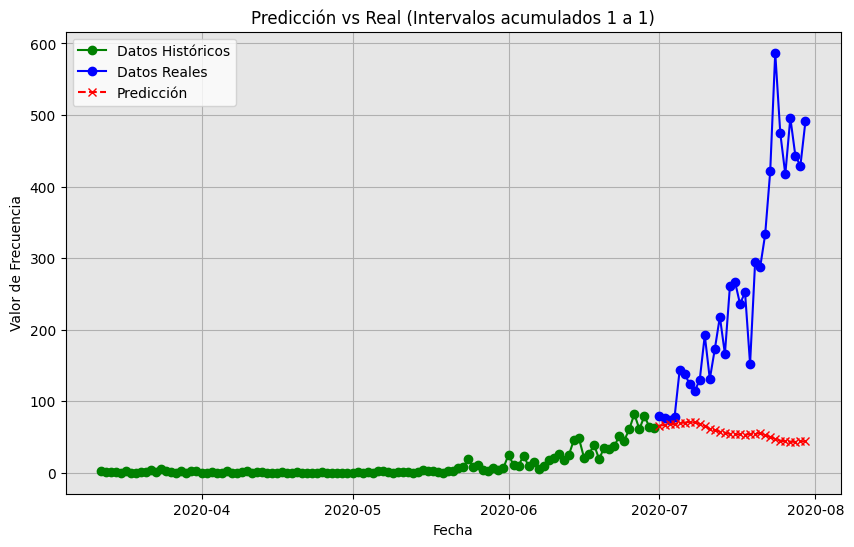

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 2: MAE = 187.61, MSE = 54042.86


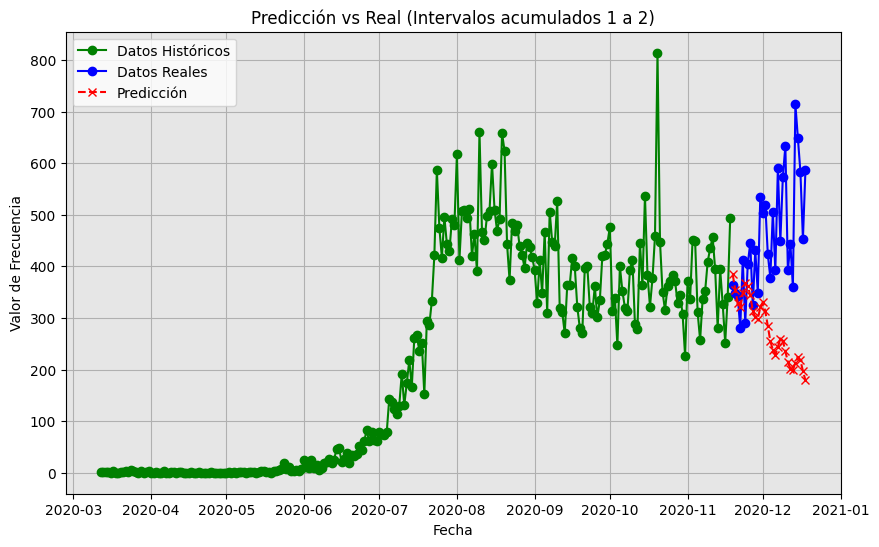

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 3: MAE = 316.34, MSE = 172432.14


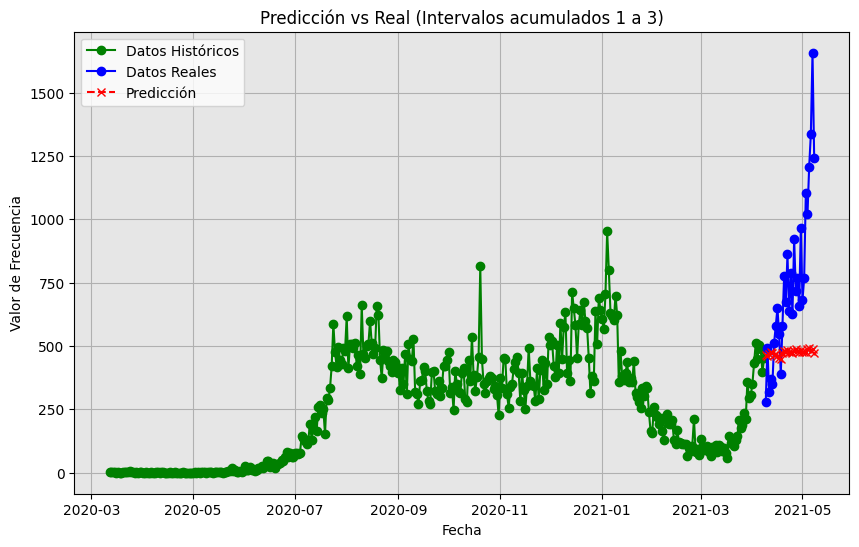

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 4: MAE = 41.80, MSE = 2038.77


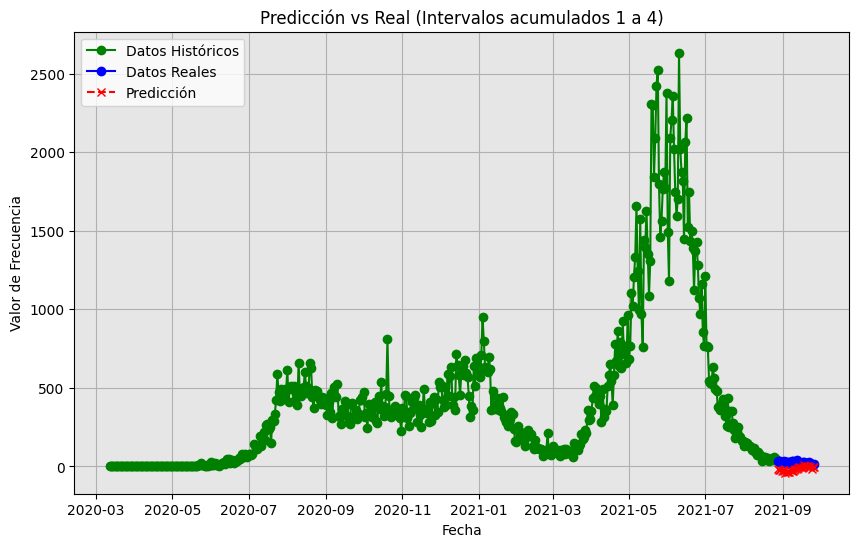

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 5: MAE = 385.63, MSE = 165428.20


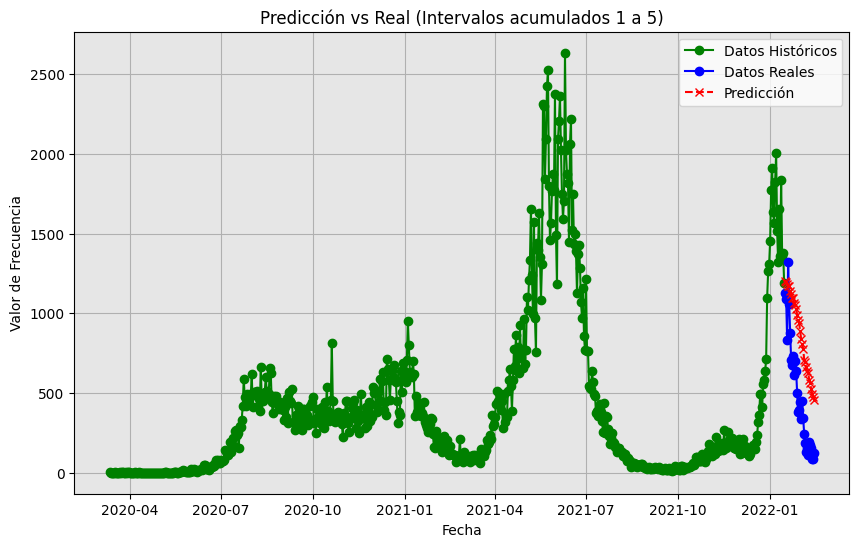

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 6: MAE = 151.10, MSE = 23289.37


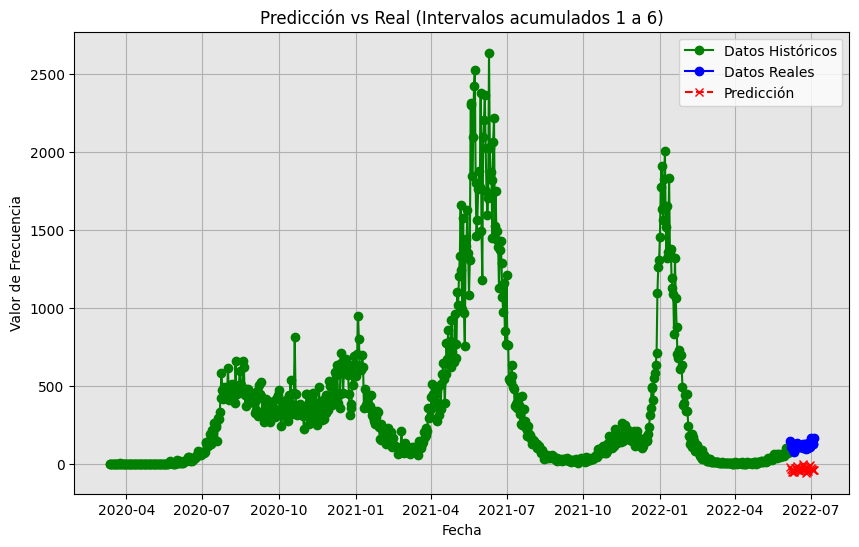

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 7: MAE = 416.36, MSE = 263496.67


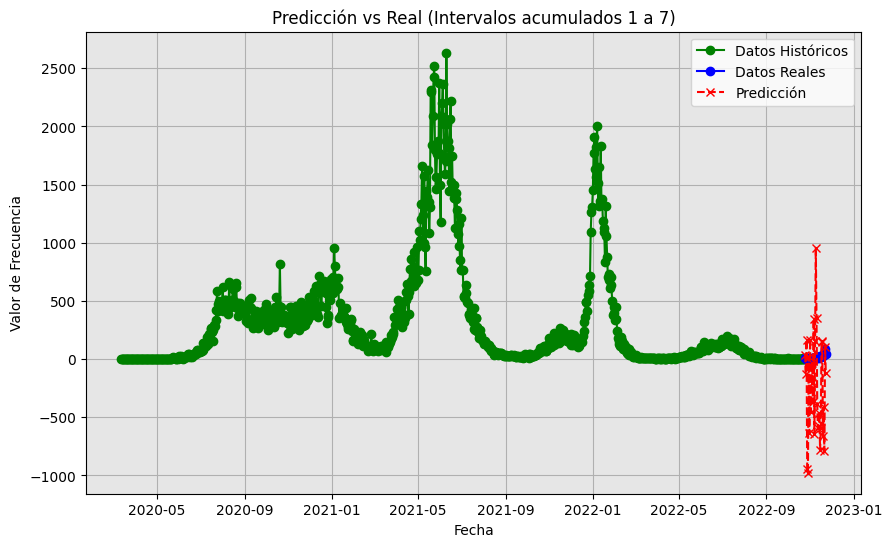

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 8: MAE = 61.51, MSE = 3840.70


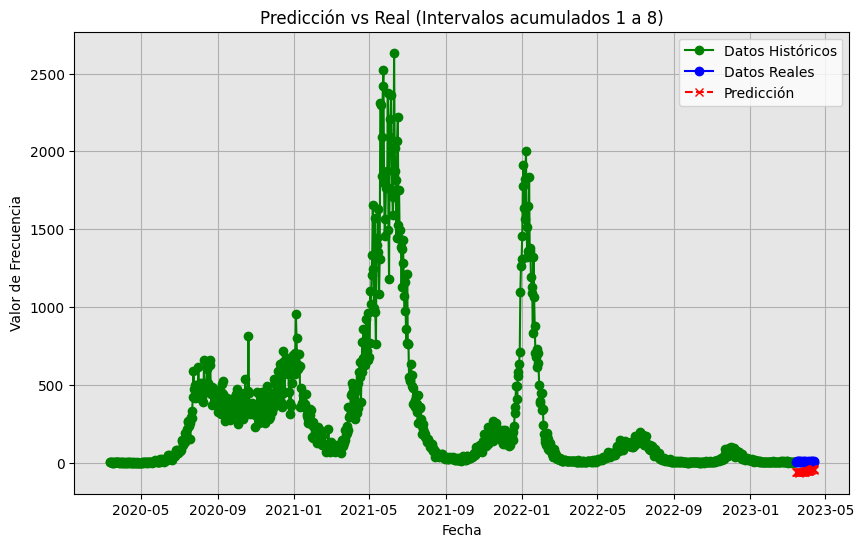


Resumen de métricas:
  Intervalos Acumulados         MAE            MSE       SMAPE
0      Intervalos 1 a 1  198.982635   63915.790876  106.295114
1      Intervalos 1 a 2  187.611755   54042.863092   49.261507
2      Intervalos 1 a 3  316.336490  172432.138545   45.571056
3      Intervalos 1 a 4   41.801022    2038.773090  194.287409
4      Intervalos 1 a 5  385.632291  165428.200357   73.704114
5      Intervalos 1 a 6  151.101156   23289.372383  199.846611
6      Intervalos 1 a 7  416.363839  263496.665838  182.115716
7      Intervalos 1 a 8   61.508628    3840.695782  200.000000


In [32]:
# Parameters
HORIZONTE = 30


resultados = []

intervalos_ordenados = create_intervals(df)

resultados = []

# Inicializamos el escalador (se ajustará en cada iteración)
scaler = MinMaxScaler(feature_range=(0, 1))

tfm = timesfm.TimesFm(
    hparams=timesfm.TimesFmHparams(
        backend="gpu",
        per_core_batch_size=32,
        horizon_len=HORIZONTE,
        num_layers=50
    ),
    checkpoint=timesfm.TimesFmCheckpoint(
        version='torch',
        huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
)

# Bucle incremental para cada acumulación de intervalos
for i in range(len(intervalos_ordenados)):
   
    # Intervalos acumulados
    intervalos_incluir = intervalos_ordenados[:i+1]

    df_final = df[df['Intervalo'].isin(intervalos_incluir)]
    
    series = df_final['Frecuencia'].values.reshape(-1, 1)

    # Inicializamos el escalador y escalamos la serie
    scaler = MinMaxScaler(feature_range=(0, 1))
    series_scaled = scaler.fit_transform(series)

    # Convertimos la serie escalada en un DataFrame
    df_scaled = pd.DataFrame(series_scaled, columns=['Frecuencia'])

    # Concatenamos la columna 'Fecha' con la columna escalada
    df_concatenado = pd.concat([df_final[['Fecha']].reset_index(drop=True), df_scaled], axis=1)

    df_train = df_concatenado.iloc[:-HORIZONTE].copy()
    df_test = df_concatenado.iloc[-HORIZONTE:].copy()

    # df_train = df_final.iloc[:-HORIZONTE].copy()
    # df_test = df_final.iloc[-HORIZONTE:].copy()

    # Preparing the data for training

    data_hist = df_train[['Fecha', 'Frecuencia']].rename(columns={
        'Fecha': 'ds',
        'Frecuencia': 'sales'
    })
    data_hist["unique_id"] = "series_1"

    forecast_df = tfm.forecast_on_df(
        inputs=data_hist,
        freq='D',
        forecast_context_len= len(data_hist),
        value_name='sales',
        num_jobs=-1)
    
    # 6. Alinear fechas y calcular métricas

    y_true = df_test['Frecuencia']
    y_pred = forecast_df['timesfm']
    
    y_pred = scaler.inverse_transform(y_pred.values.reshape(-1, 1))
    y_true = scaler.inverse_transform(y_true.values.reshape(-1, 1))


    # Calculamos las métricas
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    smape_value = smape(y_true, y_pred)

    resultados.append({
        'Intervalos Acumulados': f"Intervalos 1 a {i+1}",
        'MAE': mae,
        'MSE': mse,
        'SMAPE': smape_value
    })
    
    print(f"Acumulando intervalos 1 a {i+1}: MAE = {mae:.2f}, MSE = {mse:.2f}")
    
    # Graficar datos históricos, datos reales (test) y predicción sobre el intervalo completo
    fig, ax = plt.subplots(figsize=(10, 6))
    # Cambiar el color de fondo del eje a un gris suave
    ax.set_facecolor('#e6e6e6')  # Puedes ajustar el código hexadecimal para obtener el gris deseado

    # Graficar datos históricos (entrenamiento)
    # Aquí se vuelven a invertir las escalas para graficar los valores reales
    historico = scaler.inverse_transform(df_train['Frecuencia'].values.reshape(-1, 1))
    ax.plot(df_train['Fecha'], historico, label="Datos Históricos", marker='o', color='green')

    # Graficar datos reales del test (último intervalo)
    ax.plot(df_test['Fecha'], y_true, label="Datos Reales", marker='o', color='blue')

    # Graficar la predicción
    ax.plot(df_test['Fecha'], y_pred, label="Predicción", marker='x', linestyle='--', color='red')

    # Etiquetas y detalles de la gráfica
    ax.set_title(f"Predicción vs Real (Intervalos acumulados 1 a {i+1})")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Valor de Frecuencia")
    ax.legend()
    ax.grid(True)

    plt.show()



df_resultados = pd.DataFrame(resultados)
print("\nResumen de métricas:")
print(df_resultados) 
